# Exploratory_data_analysis

Conduct EDA on NBA players' attributes data to examine relations between their attributes and their salary

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from numpy import median
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Load the data

In [2]:
# load the data
df = pd.read_csv('clean_data.csv')

In [3]:
# check out its appearance
df.head()

,DISPLAY_FIRST_LAST,SCHOOL,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,TEAM_NAME,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,PIE,current_avg_salary,age,year_played
0,Steven Adams,Pittsburgh,83.0,265.0,7,12.0,Center,Pelicans,2013,1,12,8.1,2.0,9.2,0.093,2.153090e+07,27,7
1,Bam Adebayo,Kentucky,81.0,255.0,3,13.0,Center-Forward,Heat,2017,1,14,19.2,5.4,9.5,0.167,2.620383e+07,23,3
2,LaMarcus Aldridge,Texas,83.0,250.0,14,12.0,Center-Forward,Spurs,2006,1,2,13.7,1.7,4.5,0.096,5.549880e+05,35,14
3,Grayson Allen,Duke,76.0,198.0,2,3.0,Guard,Grizzlies,2018,1,21,9.5,2.1,3.1,0.085,4.147610e+06,25,2
4,Jarrett Allen,Texas,83.0,243.0,3,31.0,Center,Cavaliers,2017,1,22,12.9,1.6,9.9,0.147,5.807674e+06,23,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISPLAY_FIRST_LAST  353 non-null    object 
 1   SCHOOL              353 non-null    object 
 2   HEIGHT              353 non-null    float64
 3   WEIGHT              353 non-null    float64
 4   SEASON_EXP          353 non-null    int64  
 5   JERSEY              350 non-null    float64
 6   POSITION            353 non-null    object 
 7   TEAM_NAME           349 non-null    object 
 8   DRAFT_YEAR          353 non-null    object 
 9   DRAFT_ROUND         353 non-null    object 
 10  DRAFT_NUMBER        353 non-null    object 
 11  PTS                 353 non-null    float64
 12  AST                 353 non-null    float64
 13  REB                 353 non-null    float64
 14  PIE                 353 non-null    float64
 15  current_avg_salary  353 non-null    float64
 16  age     

Looks like there are some columns still have null value

In [5]:
df.shape

(353, 18)

In [6]:
#fill NAN value will the row above
df = df.fillna(axis=0, method='ffill')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISPLAY_FIRST_LAST  353 non-null    object 
 1   SCHOOL              353 non-null    object 
 2   HEIGHT              353 non-null    float64
 3   WEIGHT              353 non-null    float64
 4   SEASON_EXP          353 non-null    int64  
 5   JERSEY              353 non-null    float64
 6   POSITION            353 non-null    object 
 7   TEAM_NAME           353 non-null    object 
 8   DRAFT_YEAR          353 non-null    object 
 9   DRAFT_ROUND         353 non-null    object 
 10  DRAFT_NUMBER        353 non-null    object 
 11  PTS                 353 non-null    float64
 12  AST                 353 non-null    float64
 13  REB                 353 non-null    float64
 14  PIE                 353 non-null    float64
 15  current_avg_salary  353 non-null    float64
 16  age     

<AxesSubplot:>

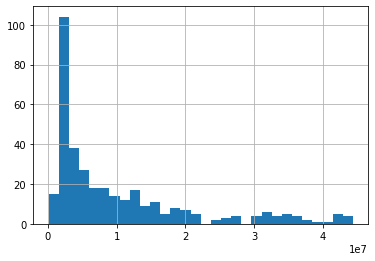

In [8]:
# The dependent vaiable is current_avg_salary.
# Making a historgram of it
df['current_avg_salary'].hist(bins=30)

Non-normal distrubution

In [9]:
df['current_avg_salary'].describe()

count    3.530000e+02
mean     1.009223e+07
std      1.084653e+07
min      9.902000e+04
25%      1.842959e+06
50%      5.655148e+06
75%      1.366667e+07
max      4.439366e+07
Name: current_avg_salary, dtype: float64

In [10]:
# Call the .corr() method on the dataset 
df.corr()

,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,PTS,AST,REB,PIE,current_avg_salary,age,year_played
HEIGHT,1.000000,0.786530,0.015362,0.202696,-0.055823,-0.309703,0.487681,0.164903,-0.013216,-0.021236,0.022075
WEIGHT,0.786530,1.000000,0.138515,0.186978,-0.008397,-0.212162,0.496341,0.226772,0.016707,0.108687,0.142393
SEASON_EXP,0.015362,0.138515,1.000000,-0.037630,0.222144,0.271789,0.208737,0.229566,0.386167,0.889913,0.995163
JERSEY,0.202696,0.186978,-0.037630,1.000000,-0.126750,-0.103306,0.041720,-0.016895,-0.105152,0.034483,-0.037983
PTS,-0.055823,-0.008397,0.222144,-0.126750,1.000000,0.727711,0.561377,0.689120,0.755556,0.057052,0.221962
AST,-0.309703,-0.212162,0.271789,-0.103306,0.727711,1.000000,0.339183,0.540921,0.691625,0.153799,0.268139
REB,0.487681,0.496341,0.208737,0.041720,0.561377,0.339183,1.000000,0.650446,0.455285,0.067002,0.208706
PIE,0.164903,0.226772,0.229566,-0.016895,0.689120,0.540921,0.650446,1.000000,0.545121,0.122678,0.229643
current_avg_salary,-0.013216,0.016707,0.386167,-0.105152,0.755556,0.691625,0.455285,0.545121,1.000000,0.238787,0.386510
age,-0.021236,0.108687,0.889913,0.034483,0.057052,0.153799,0.067002,0.122678,0.238787,1.000000,0.892956


Look like PTS, AST, REB and PIE have strong correlation with salary. It is interesting that height and weight seems do not have correlation with salary. One reason could be NBA players have similar height and weight at the same position.

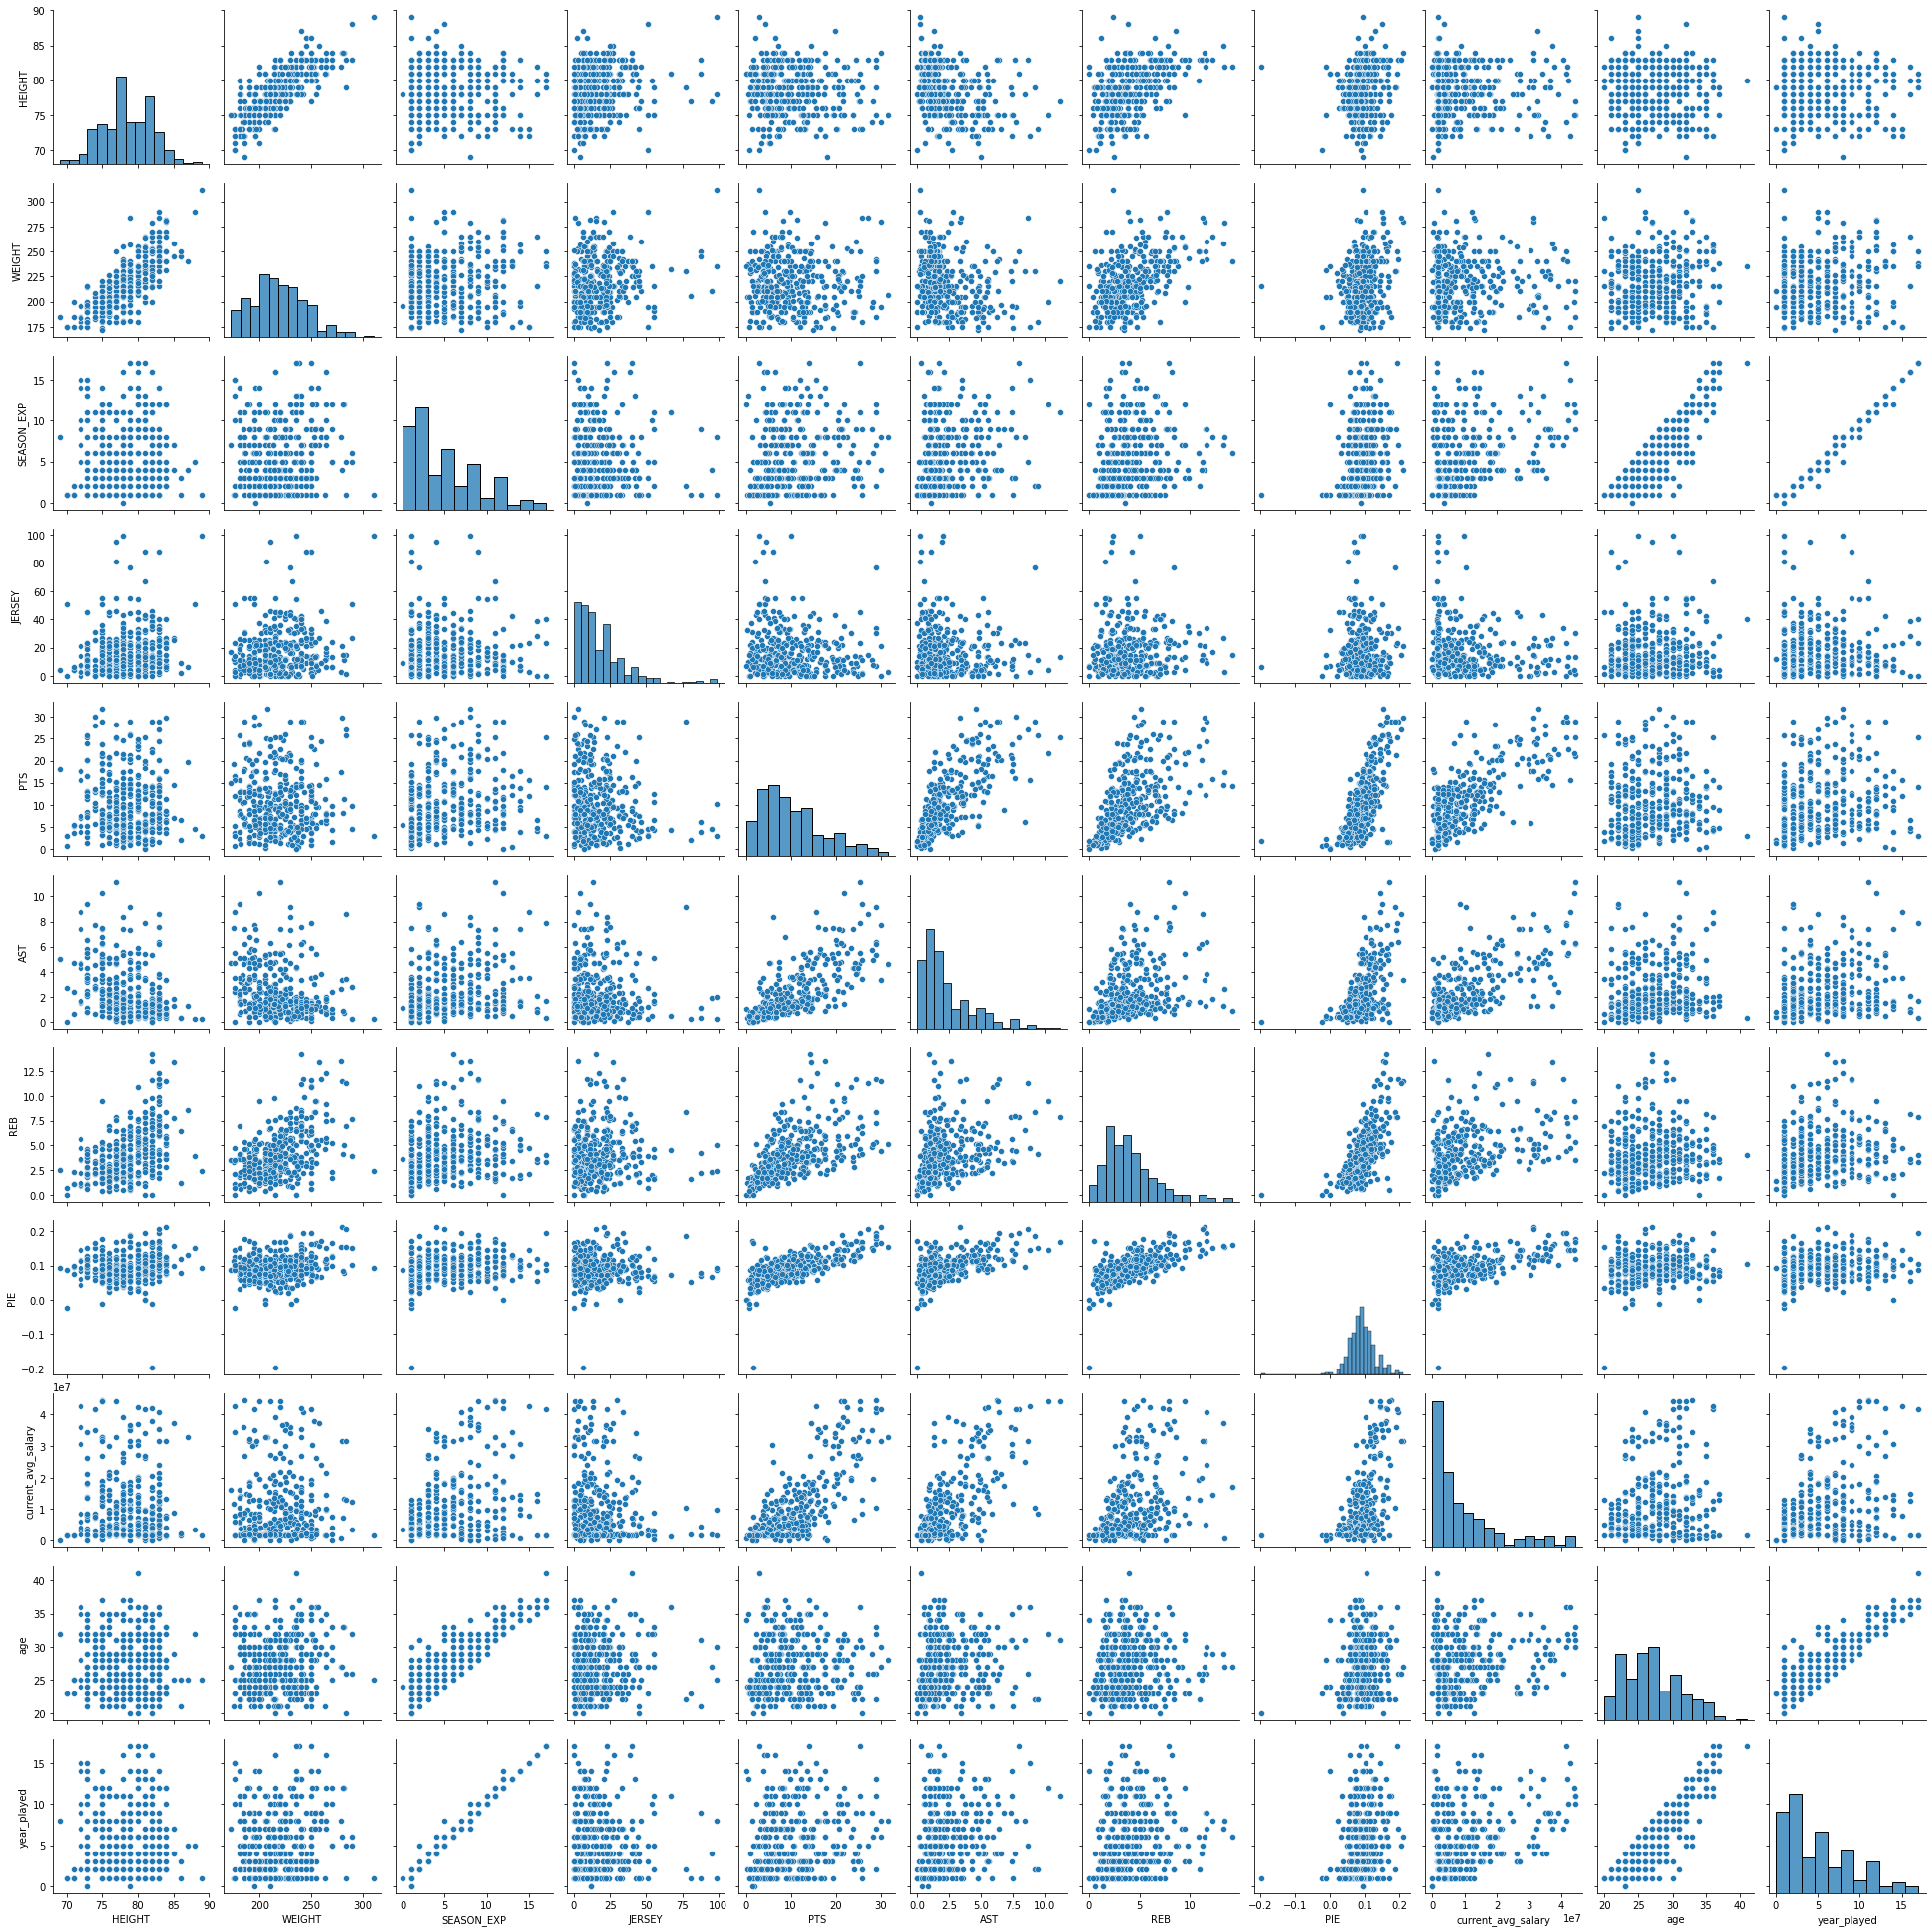

In [11]:
# Make a pairplot of the data
sns.pairplot(df)

<AxesSubplot:>

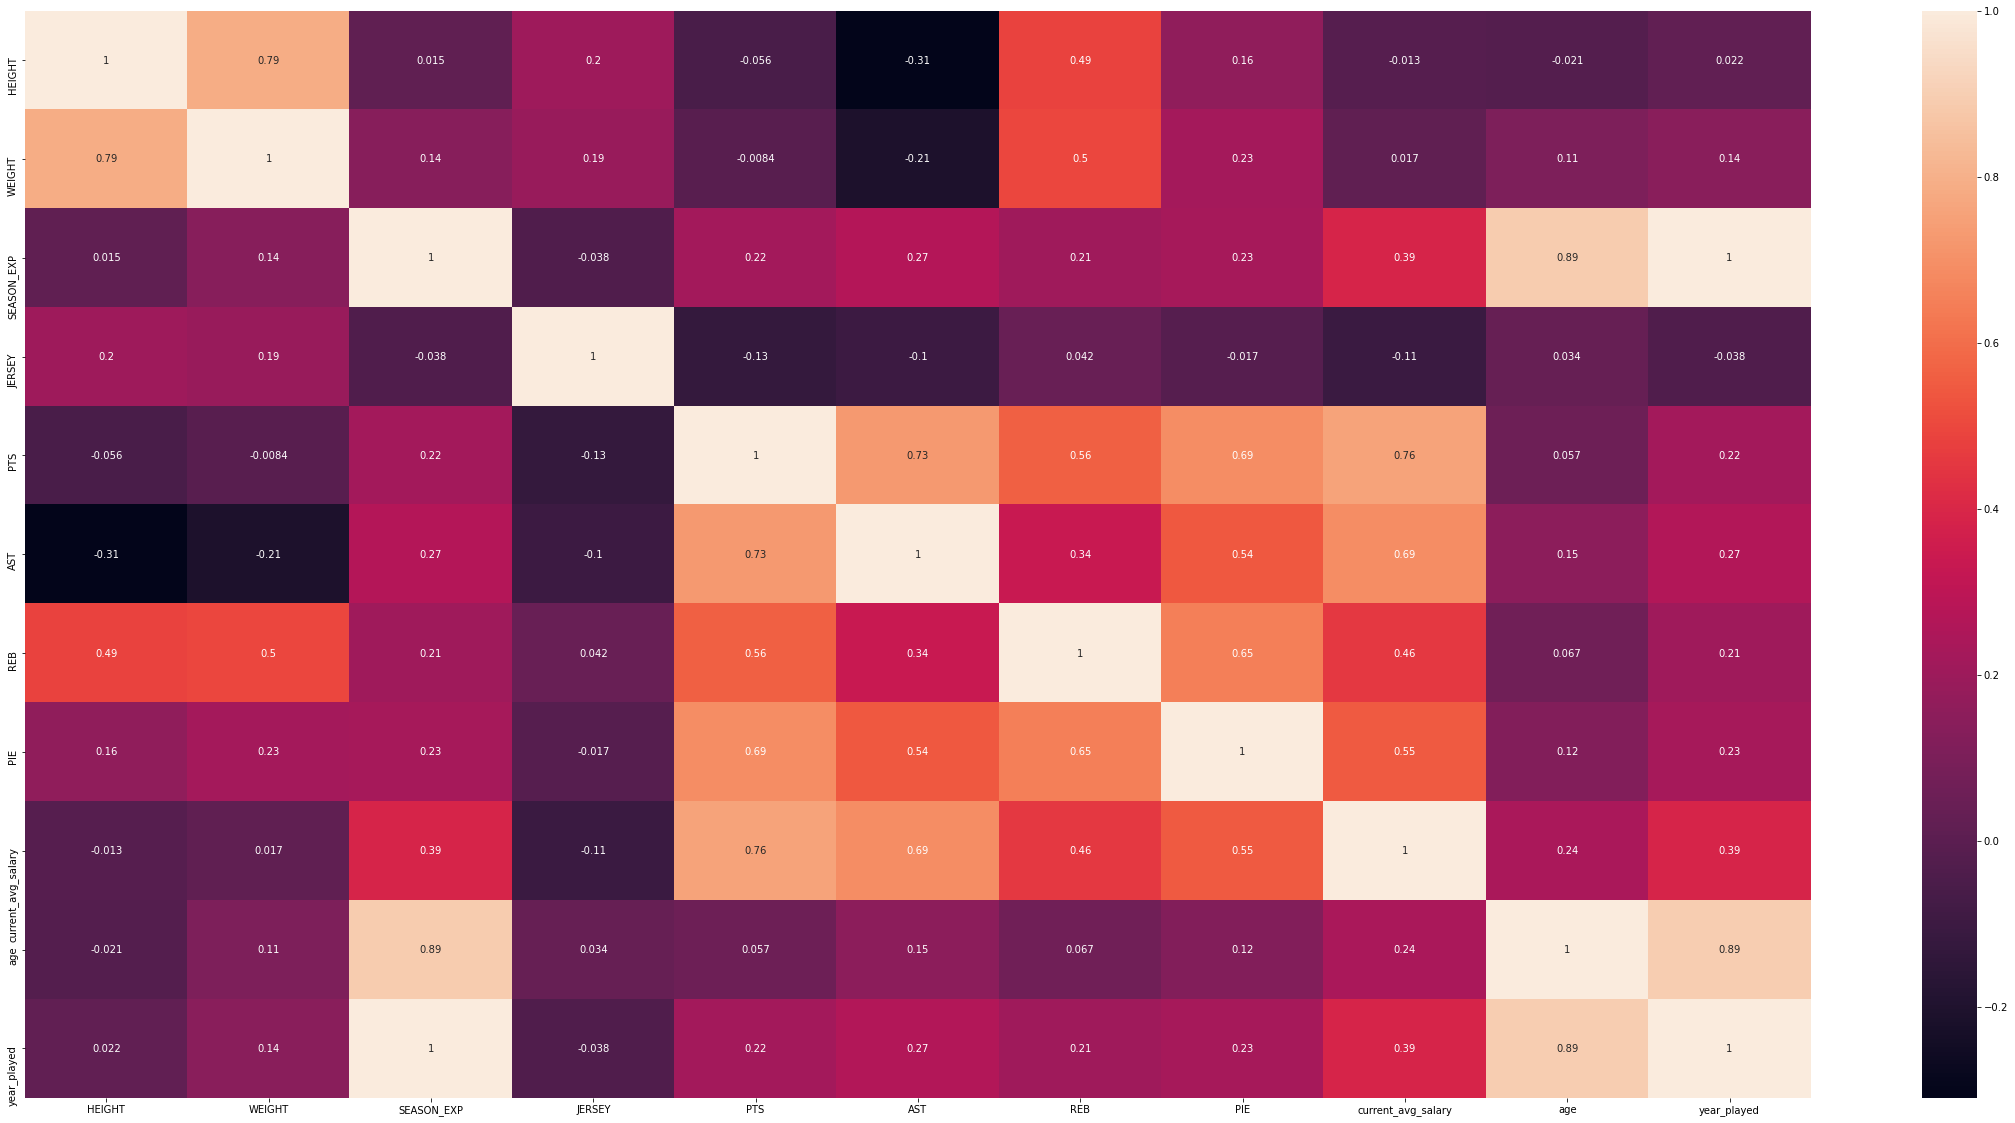

In [12]:
# Make a heatmap of the data 
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot=True)

Look like PTS, AST, REB and PIE have strong correlation with salary

<AxesSubplot:xlabel='PTS', ylabel='current_avg_salary'>

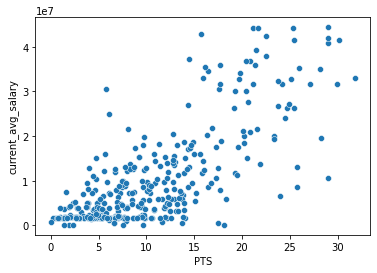

In [13]:
# plot PTS against salary
sns.scatterplot(x='PTS', y='current_avg_salary', data=df)

<AxesSubplot:xlabel='PTS', ylabel='current_avg_salary'>

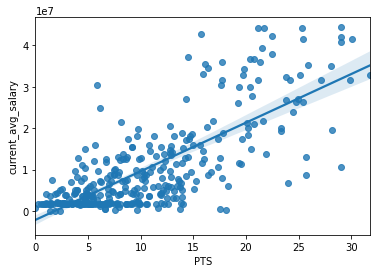

In [14]:
# Call the regplot method on the sns object
sns.regplot(x='PTS', y='current_avg_salary', data=df)

<AxesSubplot:xlabel='AST', ylabel='current_avg_salary'>

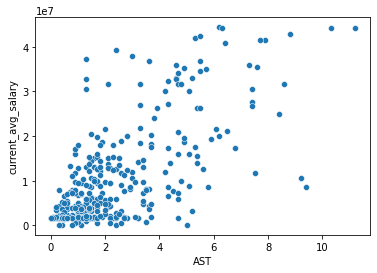

In [15]:
# plot AST against salary
sns.scatterplot(x='AST', y='current_avg_salary', data=df)

<AxesSubplot:xlabel='AST', ylabel='current_avg_salary'>

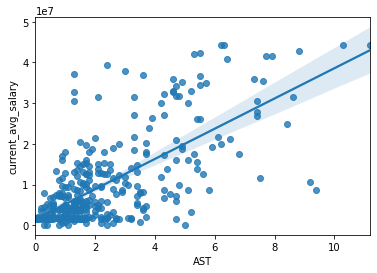

In [16]:
sns.regplot(x='AST', y='current_avg_salary', data=df)

<AxesSubplot:xlabel='REB', ylabel='current_avg_salary'>

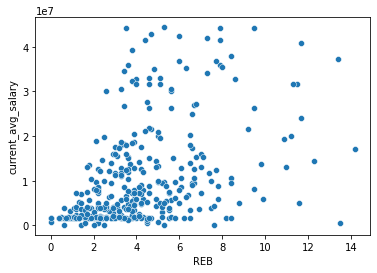

In [17]:
# plot REB against salary
sns.scatterplot(x='REB', y='current_avg_salary', data=df)

<AxesSubplot:xlabel='REB', ylabel='current_avg_salary'>

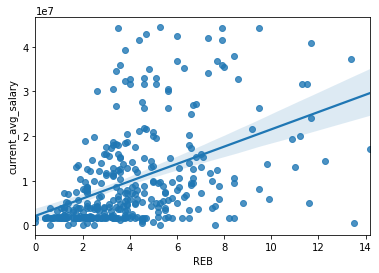

In [18]:
sns.regplot(x='REB', y='current_avg_salary', data=df)

<AxesSubplot:xlabel='REB', ylabel='current_avg_salary'>

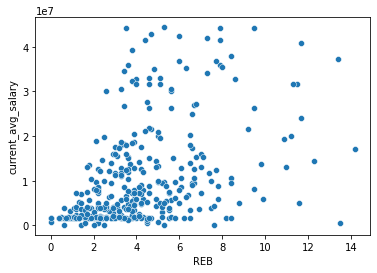

In [19]:
# plot PIE against salary
sns.scatterplot(x='REB', y='current_avg_salary', data=df)

<AxesSubplot:xlabel='PIE', ylabel='current_avg_salary'>

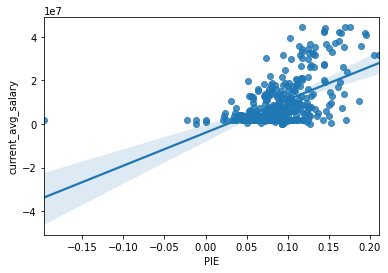

In [20]:
sns.regplot(x='PIE', y='current_avg_salary', data=df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISPLAY_FIRST_LAST  353 non-null    object 
 1   SCHOOL              353 non-null    object 
 2   HEIGHT              353 non-null    float64
 3   WEIGHT              353 non-null    float64
 4   SEASON_EXP          353 non-null    int64  
 5   JERSEY              353 non-null    float64
 6   POSITION            353 non-null    object 
 7   TEAM_NAME           353 non-null    object 
 8   DRAFT_YEAR          353 non-null    object 
 9   DRAFT_ROUND         353 non-null    object 
 10  DRAFT_NUMBER        353 non-null    object 
 11  PTS                 353 non-null    float64
 12  AST                 353 non-null    float64
 13  REB                 353 non-null    float64
 14  PIE                 353 non-null    float64
 15  current_avg_salary  353 non-null    float64
 16  age     

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Center'),
  Text(1, 0, 'Center-Forward'),
  Text(2, 0, 'Guard'),
  Text(3, 0, 'Forward-Guard'),
  Text(4, 0, 'Forward'),
  Text(5, 0, 'Guard-Forward'),
  Text(6, 0, 'Forward-Center')])

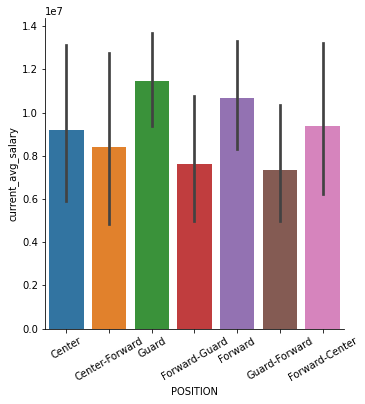

In [22]:
# Now look at categorically varibles
# make bar plot position against salary
sns.catplot(x='POSITION', y='current_avg_salary', data=df, kind='bar')
plt.xticks(rotation=30)

Guard has the high average salary

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Center'),
  Text(1, 0, 'Center-Forward'),
  Text(2, 0, 'Guard'),
  Text(3, 0, 'Forward-Guard'),
  Text(4, 0, 'Forward'),
  Text(5, 0, 'Guard-Forward'),
  Text(6, 0, 'Forward-Center')])

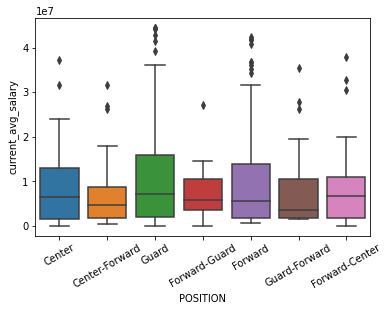

In [23]:
# make box plot to see if there any outliner
sns.boxplot(x='POSITION', y='current_avg_salary', data=df)
plt.xticks(rotation=30)

Seem like there is more outliner in Guard and Forward

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Center'),
  Text(1, 0, 'Center-Forward'),
  Text(2, 0, 'Guard'),
  Text(3, 0, 'Forward-Guard'),
  Text(4, 0, 'Forward'),
  Text(5, 0, 'Guard-Forward'),
  Text(6, 0, 'Forward-Center')])

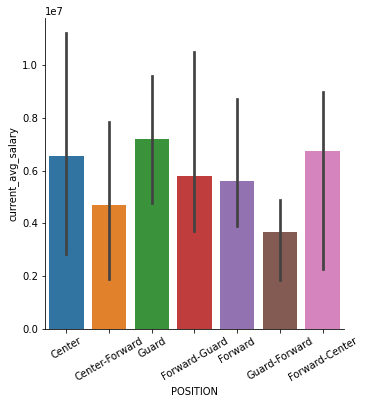

In [24]:
# plot position against salary using median
sns.catplot(x='POSITION', y='current_avg_salary', data=df, kind='bar', estimator=median)
plt.xticks(rotation=30)

with median, guard's salary is much lower than mean, but still the high. Forward became fifth instead of second. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, '12'),
  Text(1, 0, '14'),
  Text(2, 0, '2'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '30'),
  Text(6, 0, '15'),
  Text(7, 0, '60'),
  Text(8, 0, '51'),
  Text(9, 0, '3'),
  Text(10, 0, '23'),
  Text(11, 0, 'Undrafted'),
  Text(12, 0, '43'),
  Text(13, 0, '1'),
  Text(14, 0, '40'),
  Text(15, 0, '6'),
  Text(16, 0, '7'),
  Text(17, 0, '25'),
  Text(18, 0, '19'),
  Text(19, 0, '42'),
  Text(20, 0, '18'),
  Text(21, 0, '35'),
  Text(22, 0, '27'),
  Text(23, 0, '31'),
  Text(24, 0, '39'),
  Text(25, 0, '13'),
  Text(26, 0, '28'),
  Text(27, 0, '50'),
  Text(28, 0, '10'),
  Text(29, 0, '36'),
  Text(30, 0, '45'),
  Text(31, 0, '46'),
  Text(32, 0, '33'),
  Text(33, 0, '9'),
  Text(34, 0, '49'),
  Text(3

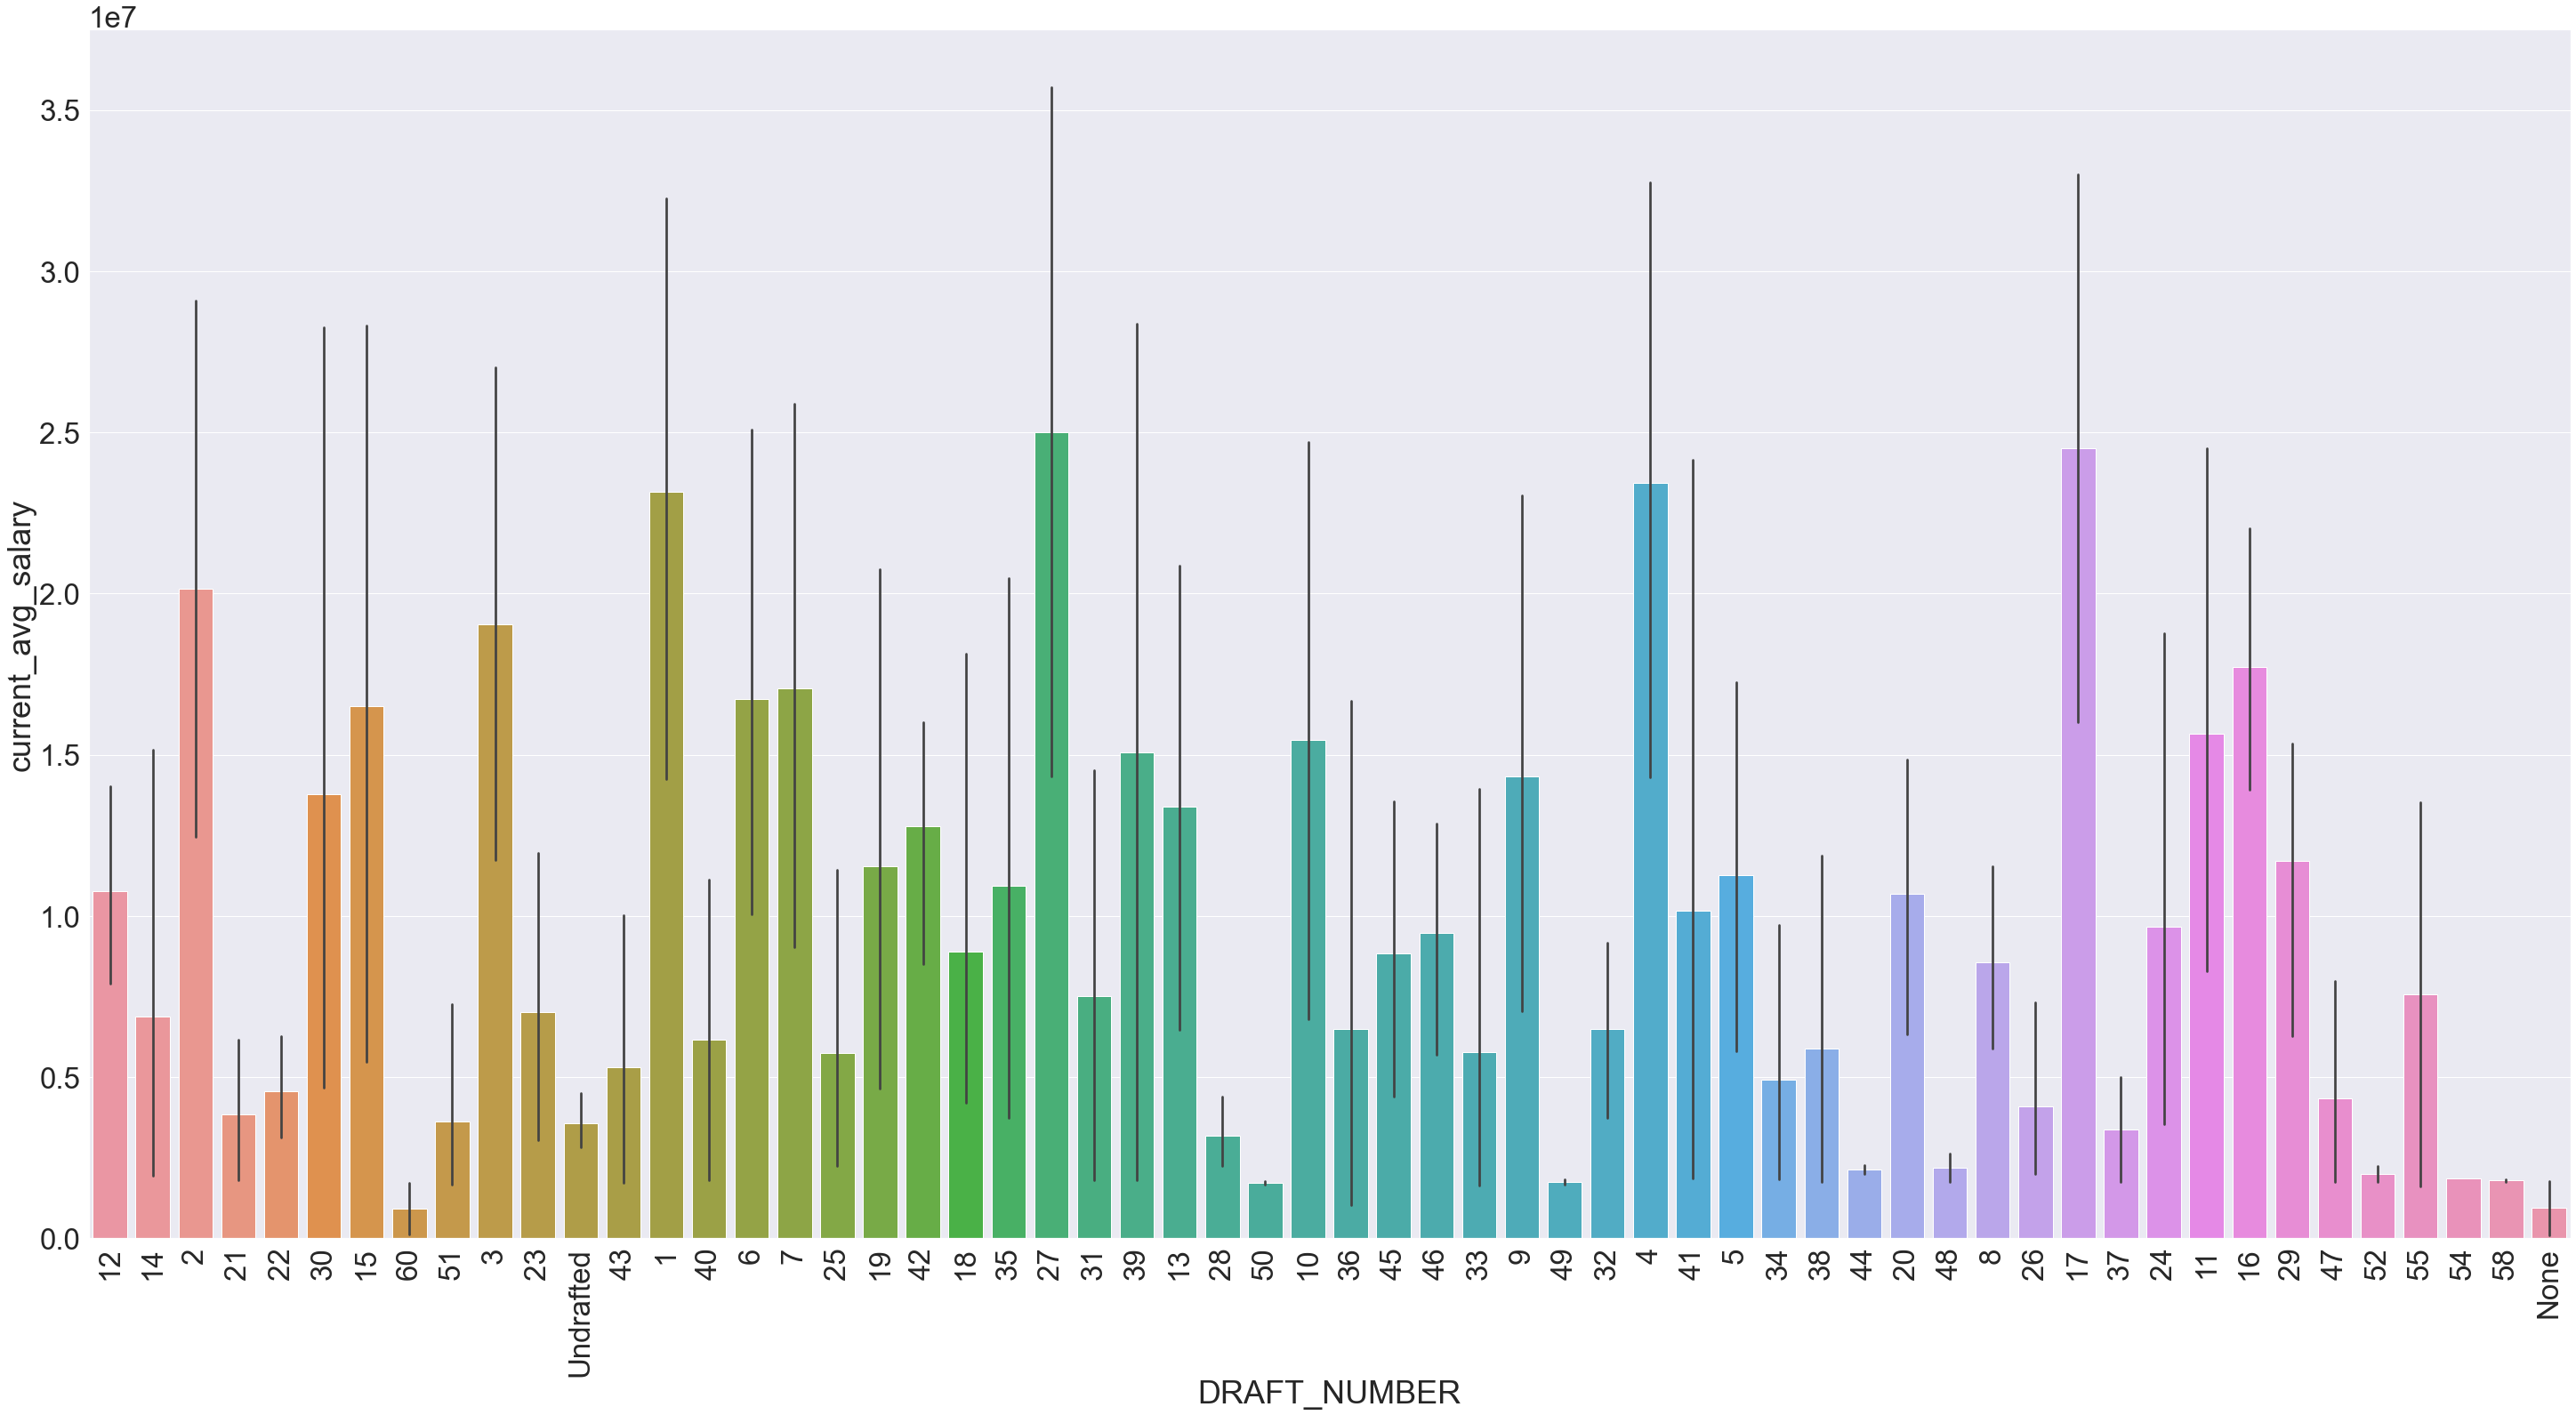

In [28]:
# plot draft-number against salary
sns.set(font_scale=3)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x=('DRAFT_NUMBER'), y='current_avg_salary', data=df)
plt.xticks(rotation=90)

Seems the first four draft_number 1-4 have the high salary. 27 and 17 also very hight.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, '12'),
  Text(1, 0, '14'),
  Text(2, 0, '2'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '30'),
  Text(6, 0, '15'),
  Text(7, 0, '60'),
  Text(8, 0, '51'),
  Text(9, 0, '3'),
  Text(10, 0, '23'),
  Text(11, 0, 'Undrafted'),
  Text(12, 0, '43'),
  Text(13, 0, '1'),
  Text(14, 0, '40'),
  Text(15, 0, '6'),
  Text(16, 0, '7'),
  Text(17, 0, '25'),
  Text(18, 0, '19'),
  Text(19, 0, '42'),
  Text(20, 0, '18'),
  Text(21, 0, '35'),
  Text(22, 0, '27'),
  Text(23, 0, '31'),
  Text(24, 0, '39'),
  Text(25, 0, '13'),
  Text(26, 0, '28'),
  Text(27, 0, '50'),
  Text(28, 0, '10'),
  Text(29, 0, '36'),
  Text(30, 0, '45'),
  Text(31, 0, '46'),
  Text(32, 0, '33'),
  Text(33, 0, '9'),
  Text(34, 0, '49'),
  Text(3

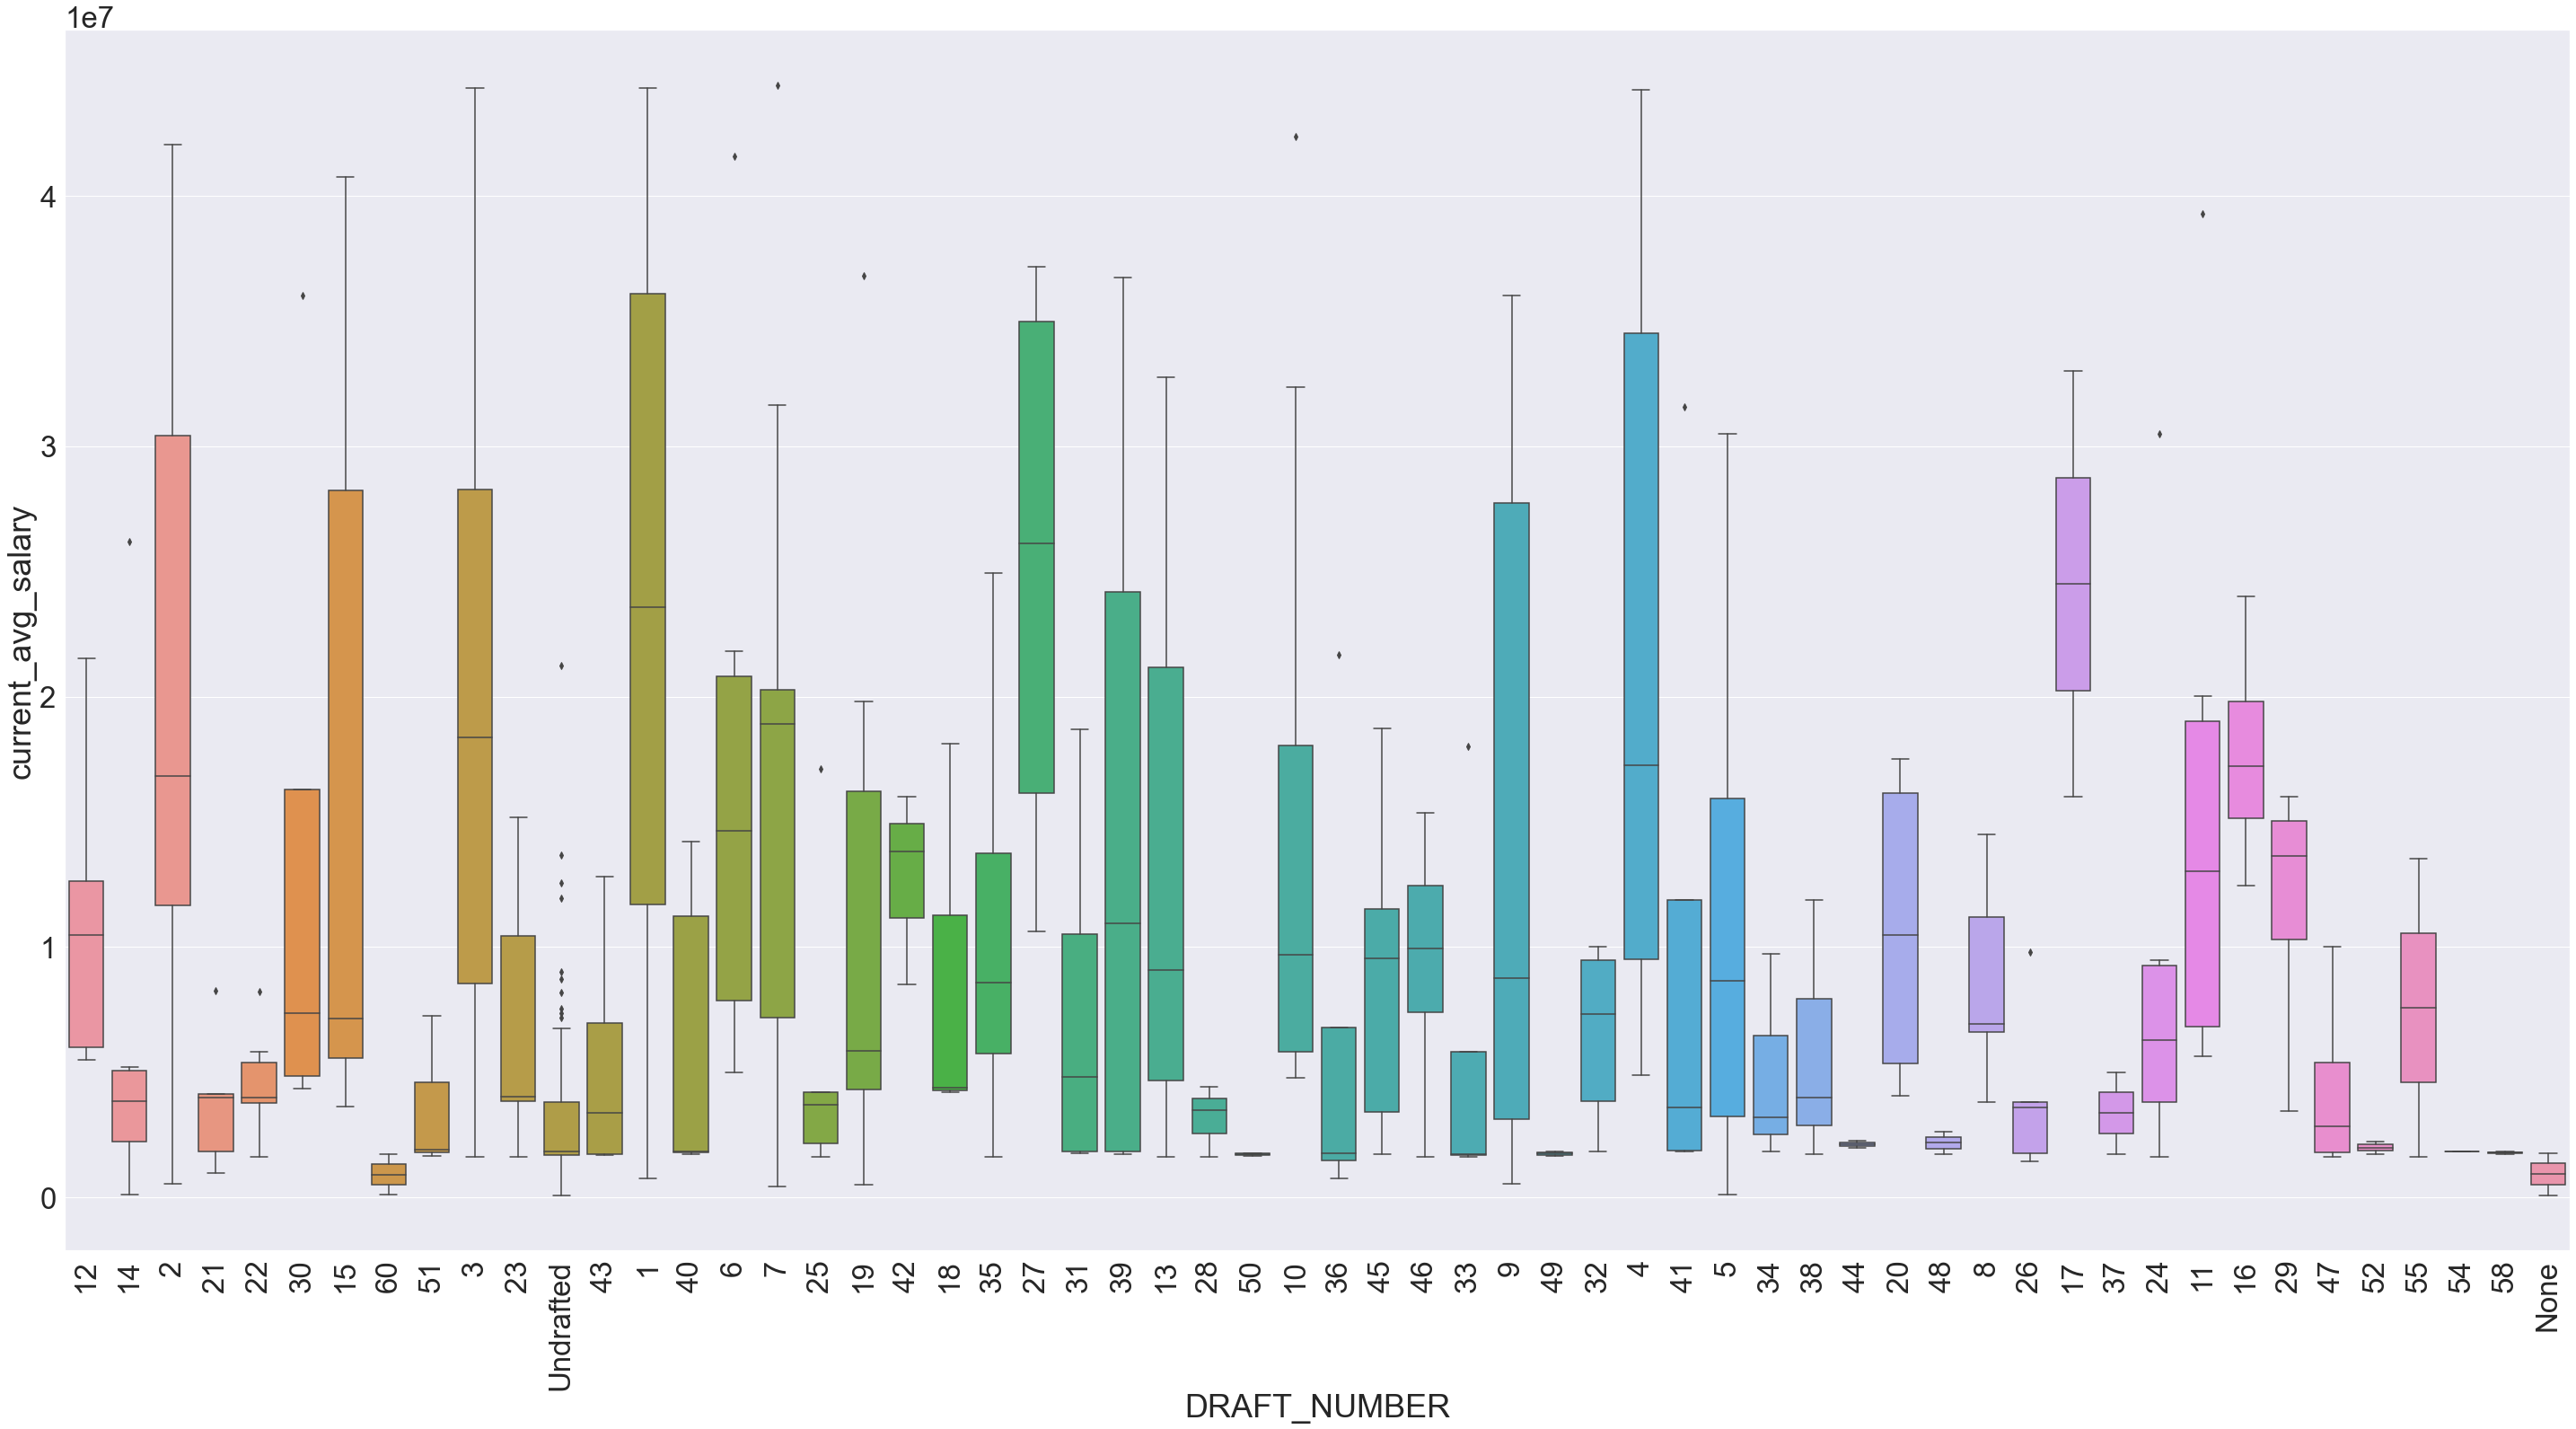

In [29]:
# make boxplot to see if there are outliners
sns.set(font_scale=3)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='DRAFT_NUMBER', y='current_avg_salary', data=df)
plt.xticks(rotation=90)

No outliners. look simiar as the bar plot. It is interesting that 17 and 27 have very salary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, '12'),
  Text(1, 0, '14'),
  Text(2, 0, '2'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '30'),
  Text(6, 0, '15'),
  Text(7, 0, '60'),
  Text(8, 0, '51'),
  Text(9, 0, '3'),
  Text(10, 0, '23'),
  Text(11, 0, 'Undrafted'),
  Text(12, 0, '43'),
  Text(13, 0, '1'),
  Text(14, 0, '40'),
  Text(15, 0, '6'),
  Text(16, 0, '7'),
  Text(17, 0, '25'),
  Text(18, 0, '19'),
  Text(19, 0, '42'),
  Text(20, 0, '18'),
  Text(21, 0, '35'),
  Text(22, 0, '27'),
  Text(23, 0, '31'),
  Text(24, 0, '39'),
  Text(25, 0, '13'),
  Text(26, 0, '28'),
  Text(27, 0, '50'),
  Text(28, 0, '10'),
  Text(29, 0, '36'),
  Text(30, 0, '45'),
  Text(31, 0, '46'),
  Text(32, 0, '33'),
  Text(33, 0, '9'),
  Text(34, 0, '49'),
  Text(3

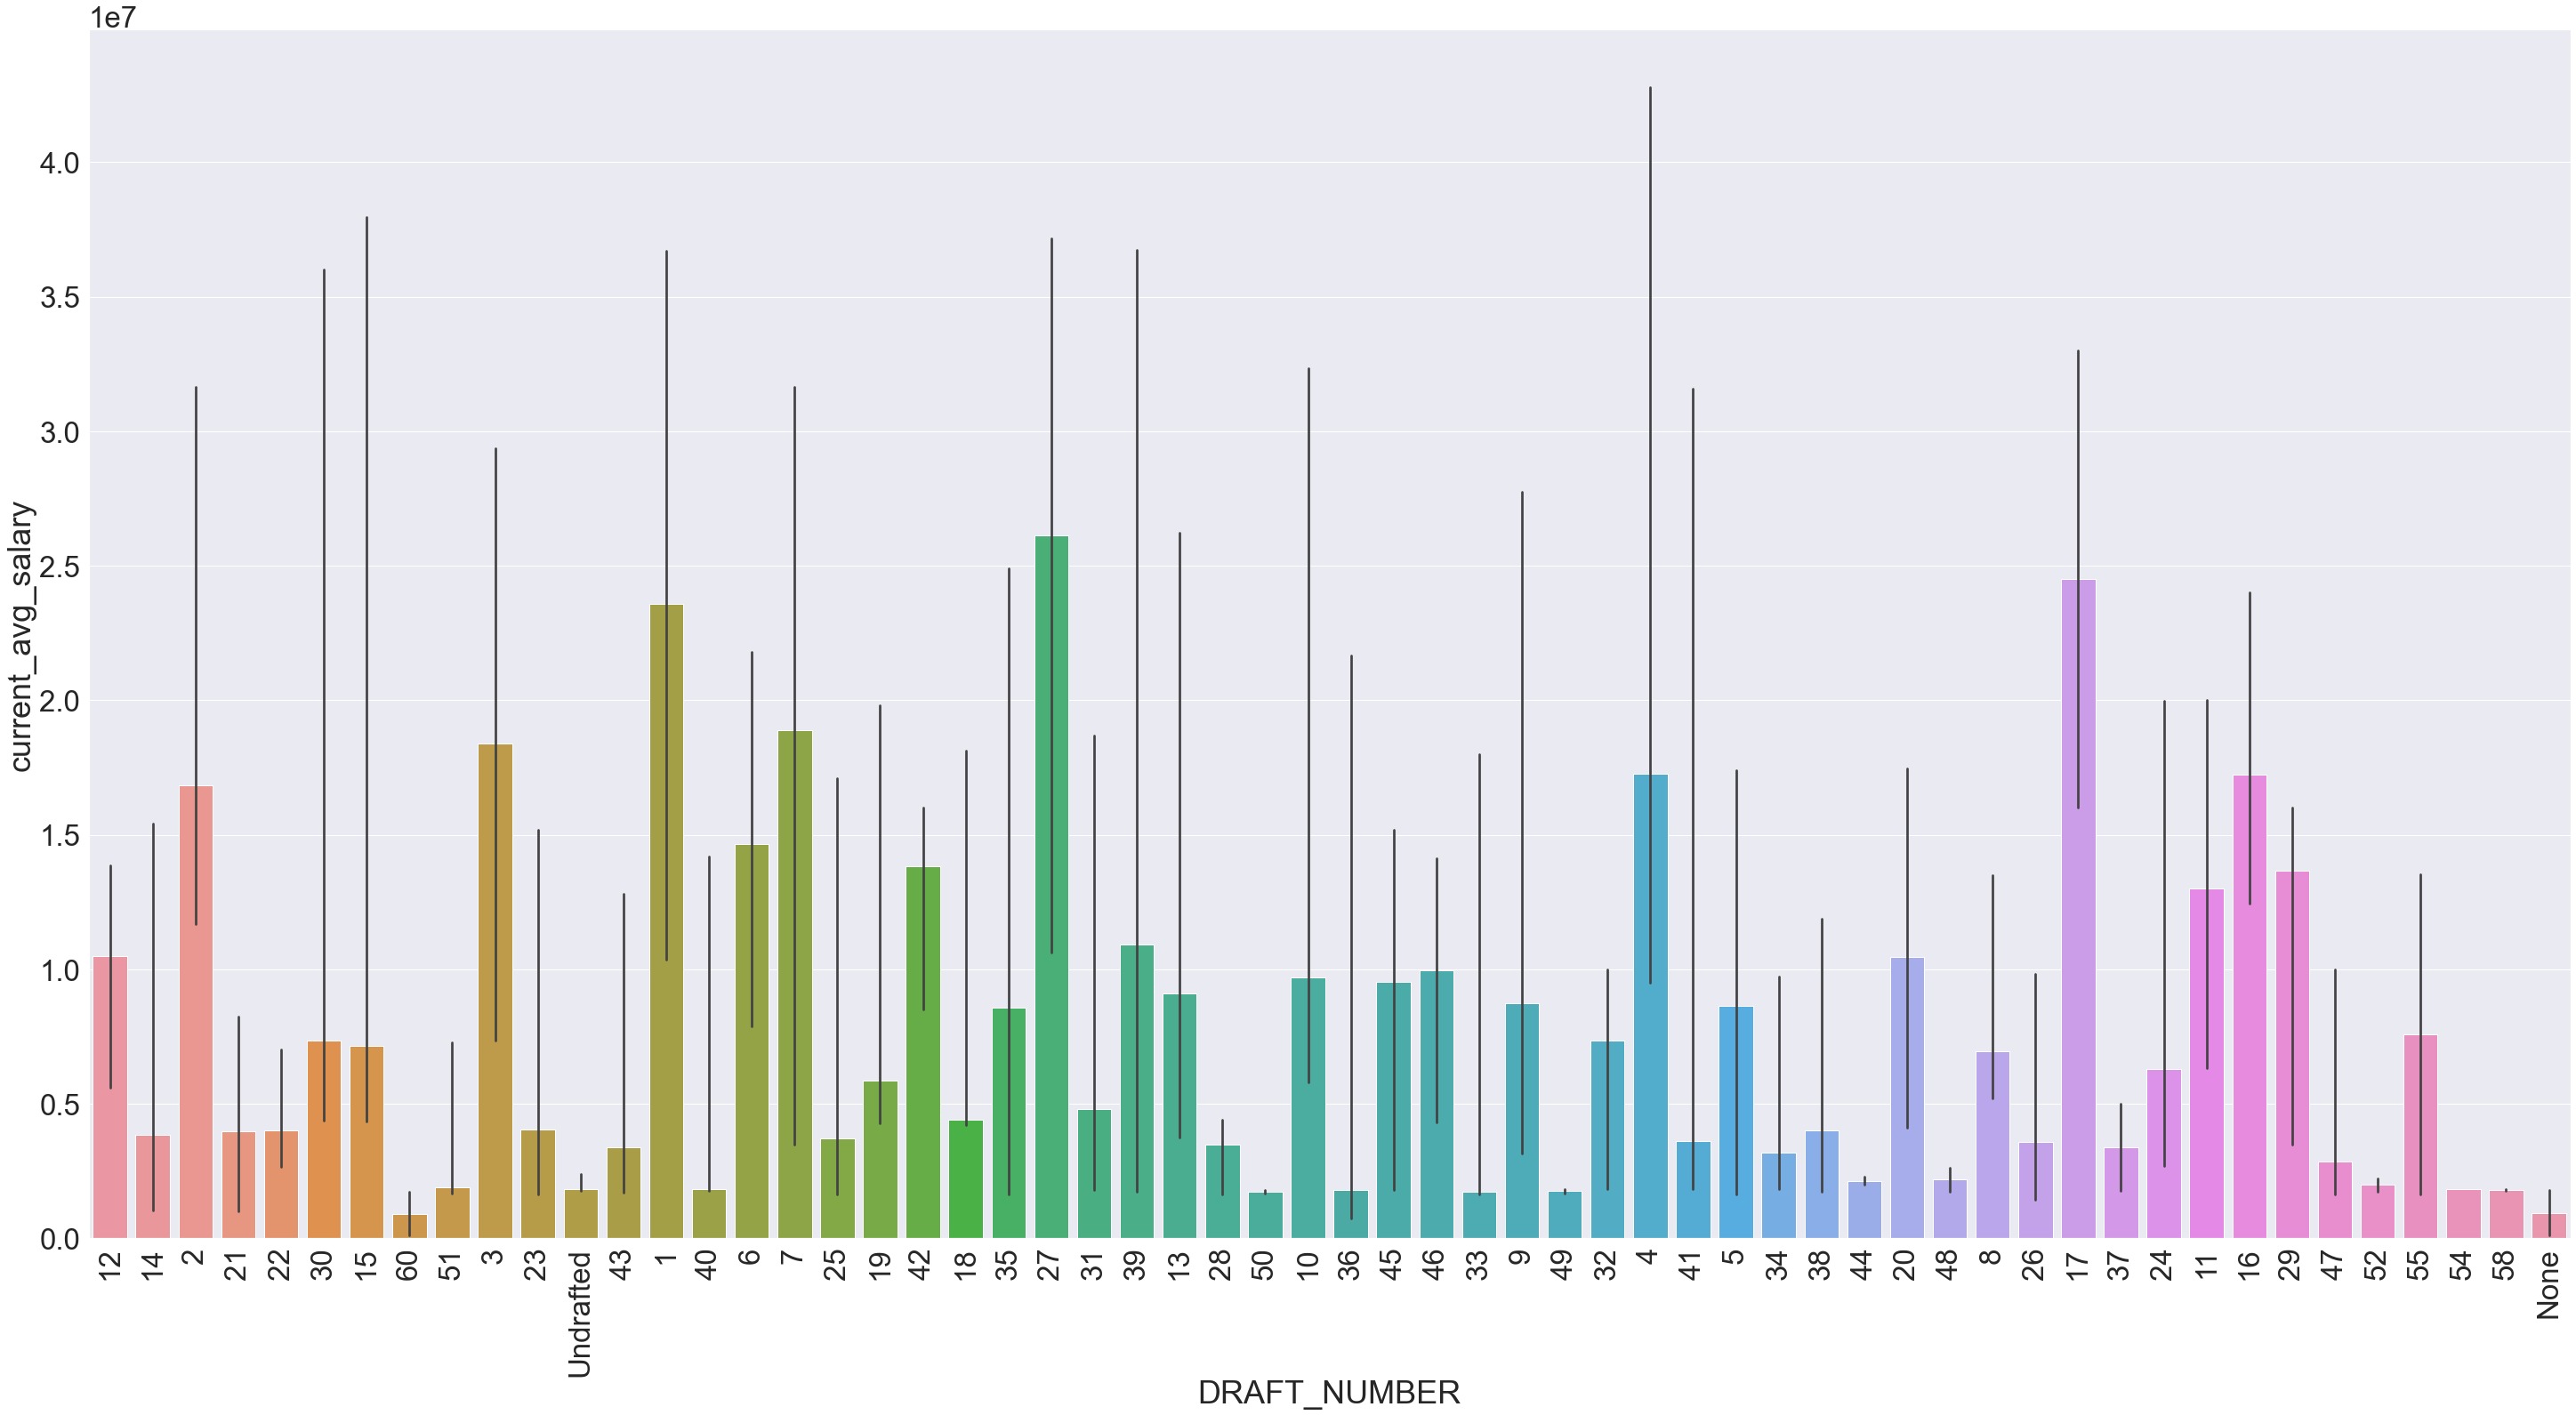

In [30]:
# plot draft-number against salary using median
sns.set(font_scale=3)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='DRAFT_NUMBER', y='current_avg_salary', data=df, estimator=median)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Pelicans'),
  Text(1, 0, 'Heat'),
  Text(2, 0, 'Spurs'),
  Text(3, 0, 'Grizzlies'),
  Text(4, 0, 'Cavaliers'),
  Text(5, 0, 'Bucks'),
  Text(6, 0, 'Lakers'),
  Text(7, 0, 'Trail Blazers'),
  Text(8, 0, 'Raptors'),
  Text(9, 0, 'Bulls'),
  Text(10, 0, 'Suns'),
  Text(11, 0, 'Magic'),
  Text(12, 0, 'Kings'),
  Text(13, 0, 'Knicks'),
  Text(14, 0, 'Nuggets'),
  Text(15, 0, 'Clippers'),
  Text(16, 0, 'Warriors'),
  Text(17, 0, 'Thunder'),
  Text(18, 0, 'Wizards'),
  Text(19, 0, 'Timberwolves'),
  Text(20, 0, 'Pacers'),
  Text(21, 0, 'Hornets'),
  Text(22, 0, 'Hawks'),
  Text(23, 0, 'Jazz'),
  Text(24, 0, '76ers'),
  Text(25, 0, 'Celtics'),
  Text(26, 0, 'Rockets'),
  Text(27, 0, 'Mavericks'),
  Text(28, 0, 'Nets'),
  Text(29, 0, 'Pistons')])

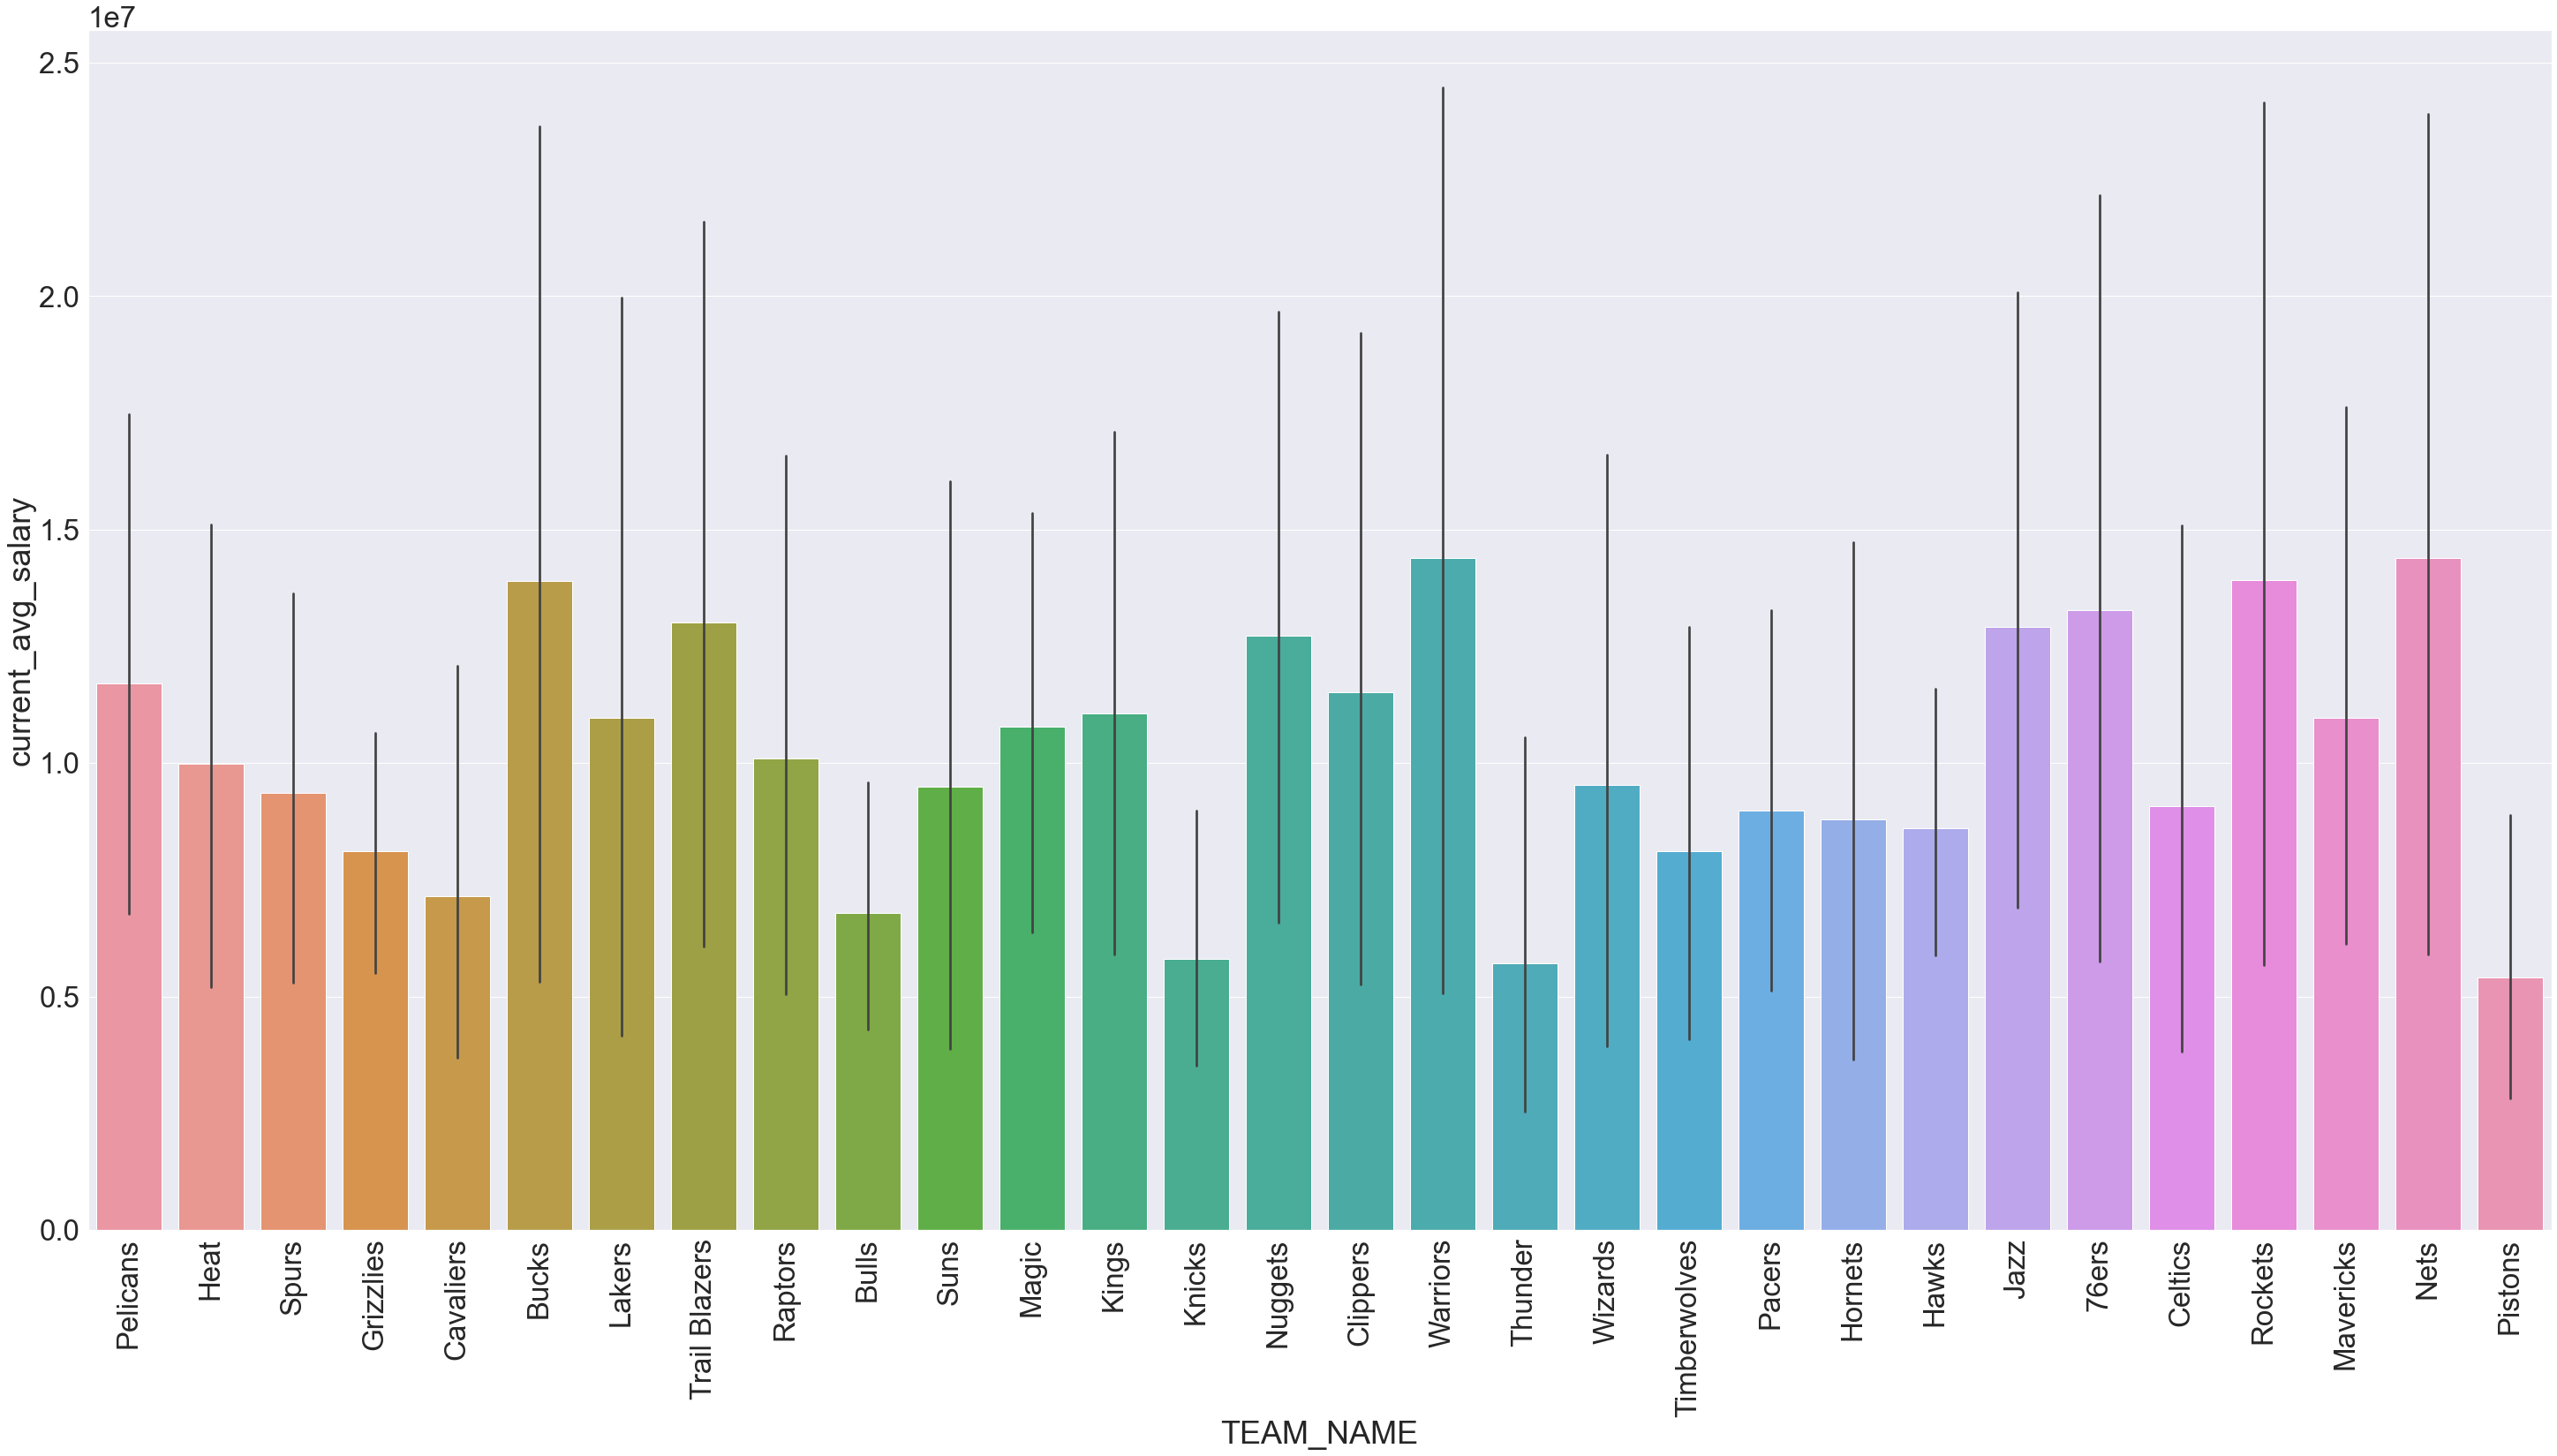

In [35]:
# plot team name against salary using median
sns.set(font_scale=3)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='TEAM_NAME', y='current_avg_salary', data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Pelicans'),
  Text(1, 0, 'Heat'),
  Text(2, 0, 'Spurs'),
  Text(3, 0, 'Grizzlies'),
  Text(4, 0, 'Cavaliers'),
  Text(5, 0, 'Bucks'),
  Text(6, 0, 'Lakers'),
  Text(7, 0, 'Trail Blazers'),
  Text(8, 0, 'Raptors'),
  Text(9, 0, 'Bulls'),
  Text(10, 0, 'Suns'),
  Text(11, 0, 'Magic'),
  Text(12, 0, 'Kings'),
  Text(13, 0, 'Knicks'),
  Text(14, 0, 'Nuggets'),
  Text(15, 0, 'Clippers'),
  Text(16, 0, 'Warriors'),
  Text(17, 0, 'Thunder'),
  Text(18, 0, 'Wizards'),
  Text(19, 0, 'Timberwolves'),
  Text(20, 0, 'Pacers'),
  Text(21, 0, 'Hornets'),
  Text(22, 0, 'Hawks'),
  Text(23, 0, 'Jazz'),
  Text(24, 0, '76ers'),
  Text(25, 0, 'Celtics'),
  Text(26, 0, 'Rockets'),
  Text(27, 0, 'Mavericks'),
  Text(28, 0, 'Nets'),
  Text(29, 0, 'Pistons')])

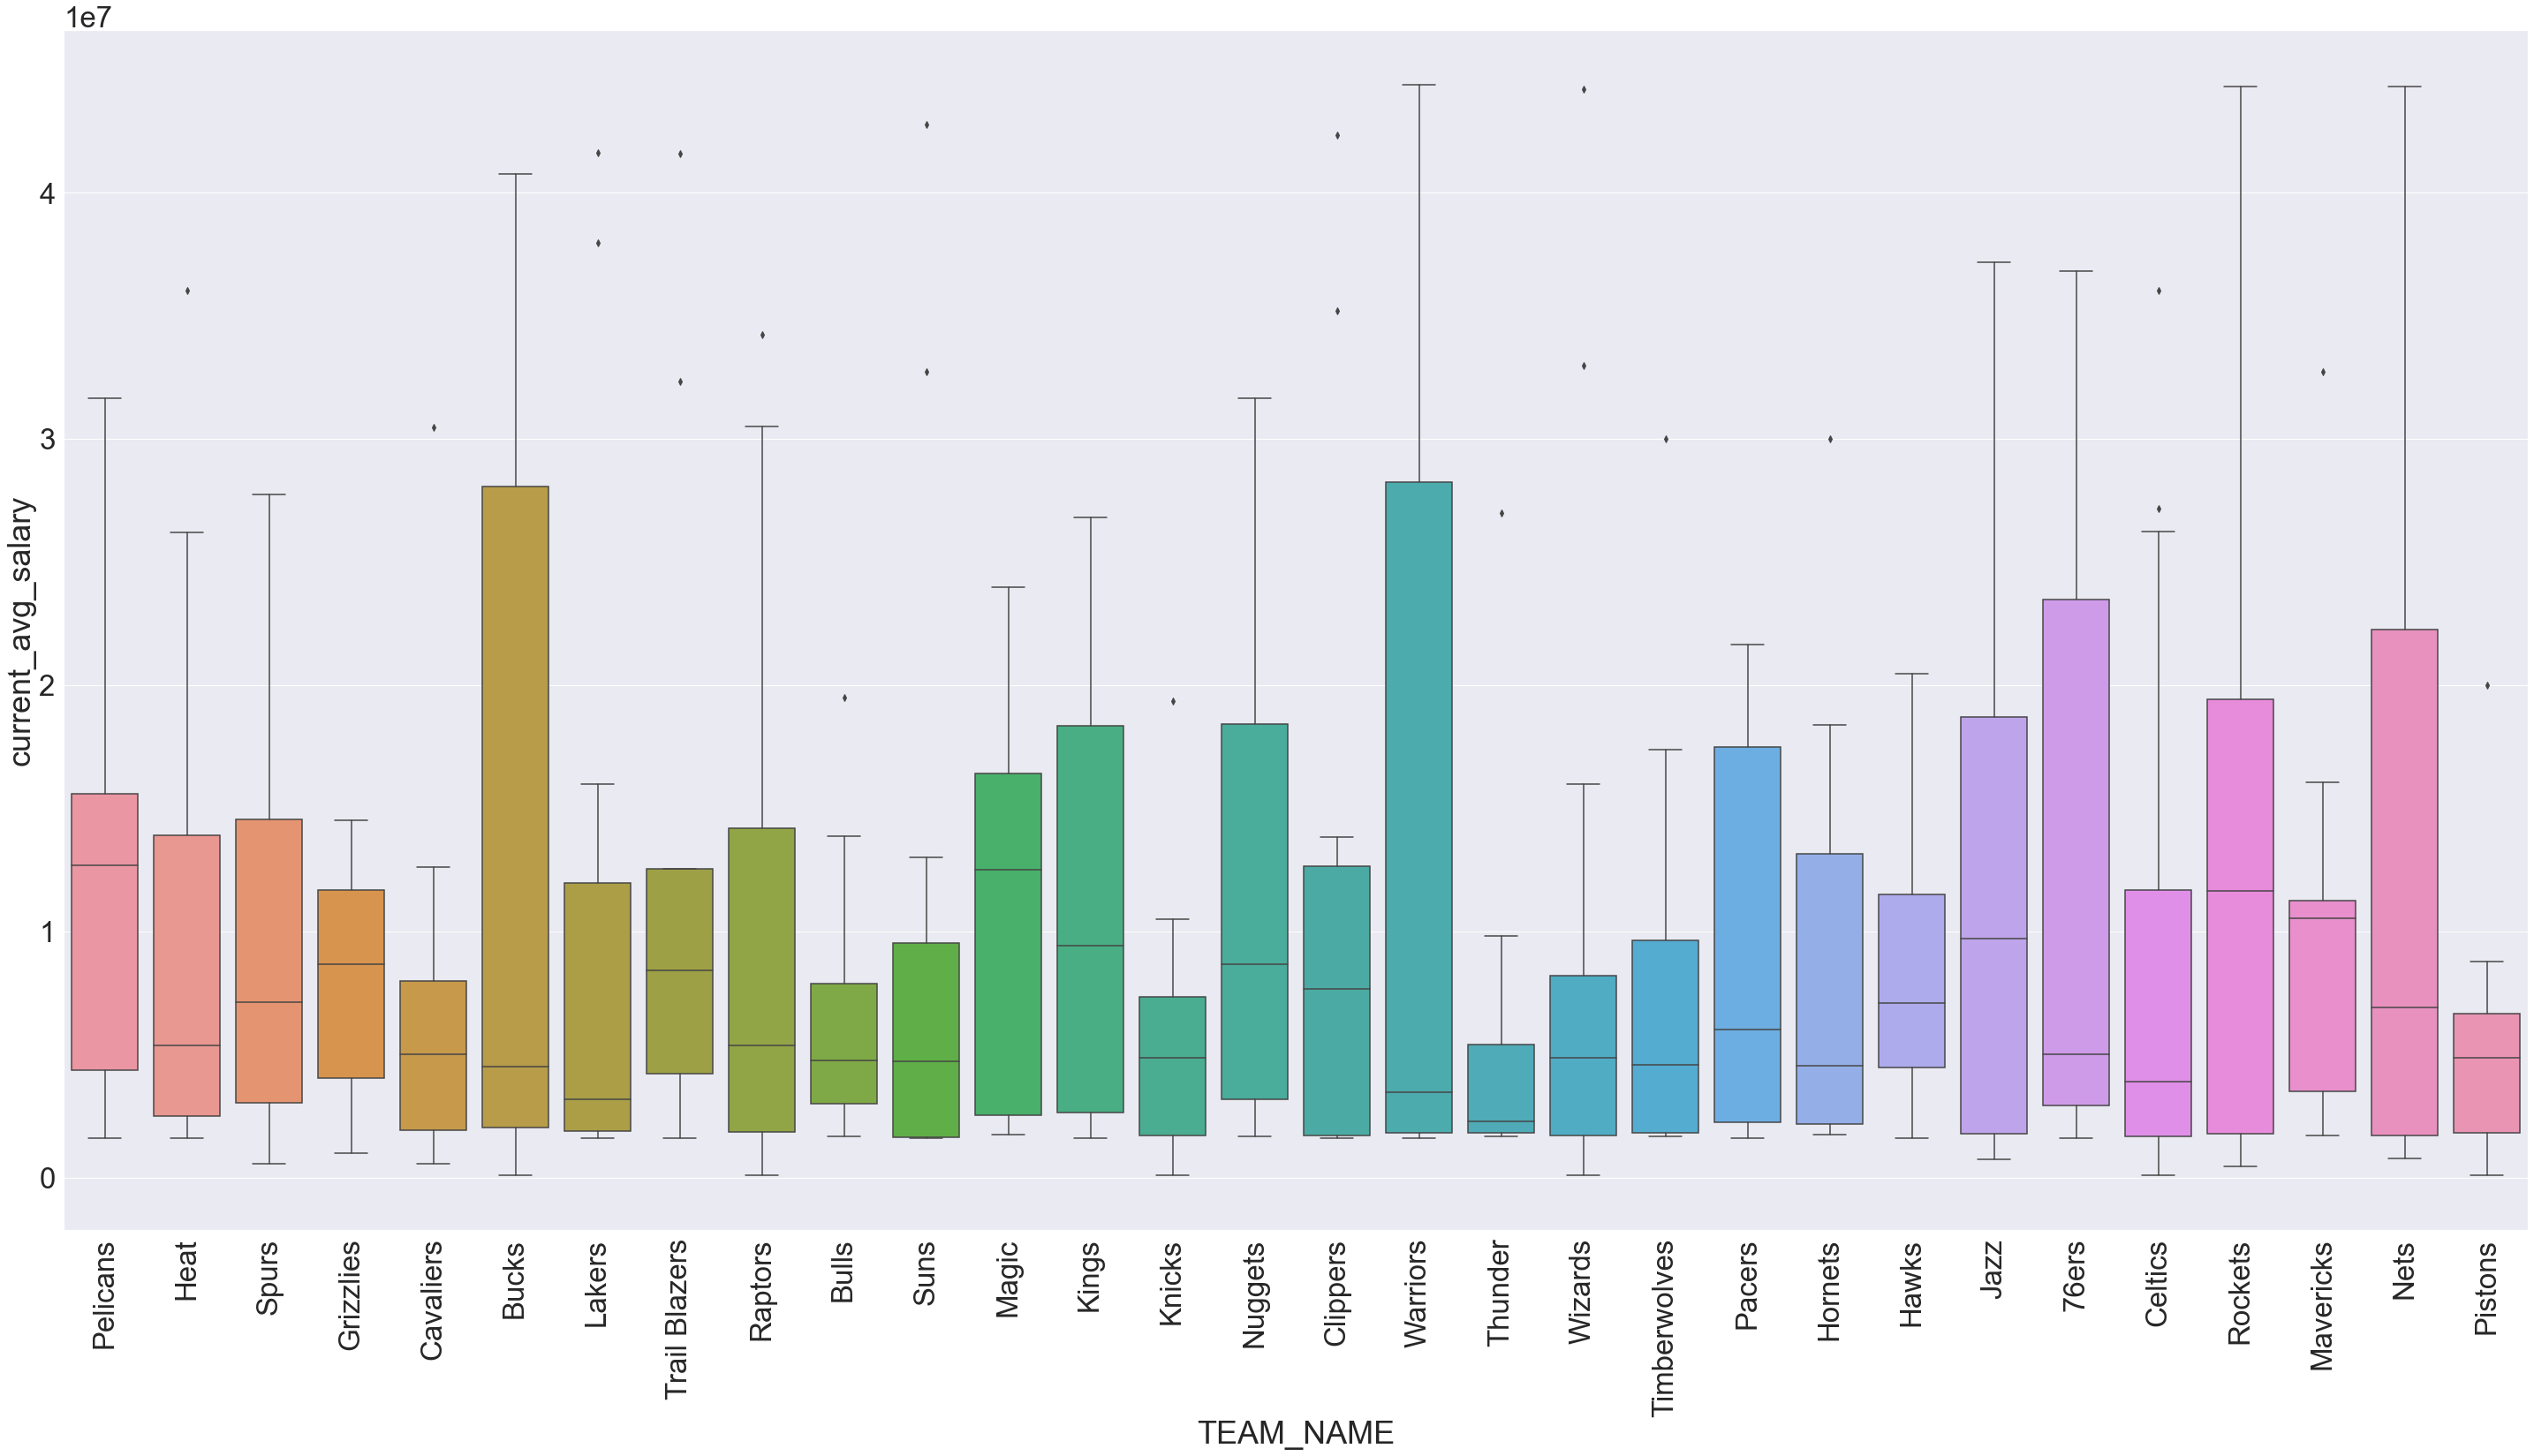

In [39]:
# make boxplot to see if there are outliners
sns.set(font_scale=3)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='TEAM_NAME', y='current_avg_salary', data=df)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152]),
 [Text(0, 0, 'Pittsburgh'),
  Text(1, 0, 'Kentucky'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Duke'),
  Text(4, 0, 'UCLA'),
  Text(5, 0, 'Fi

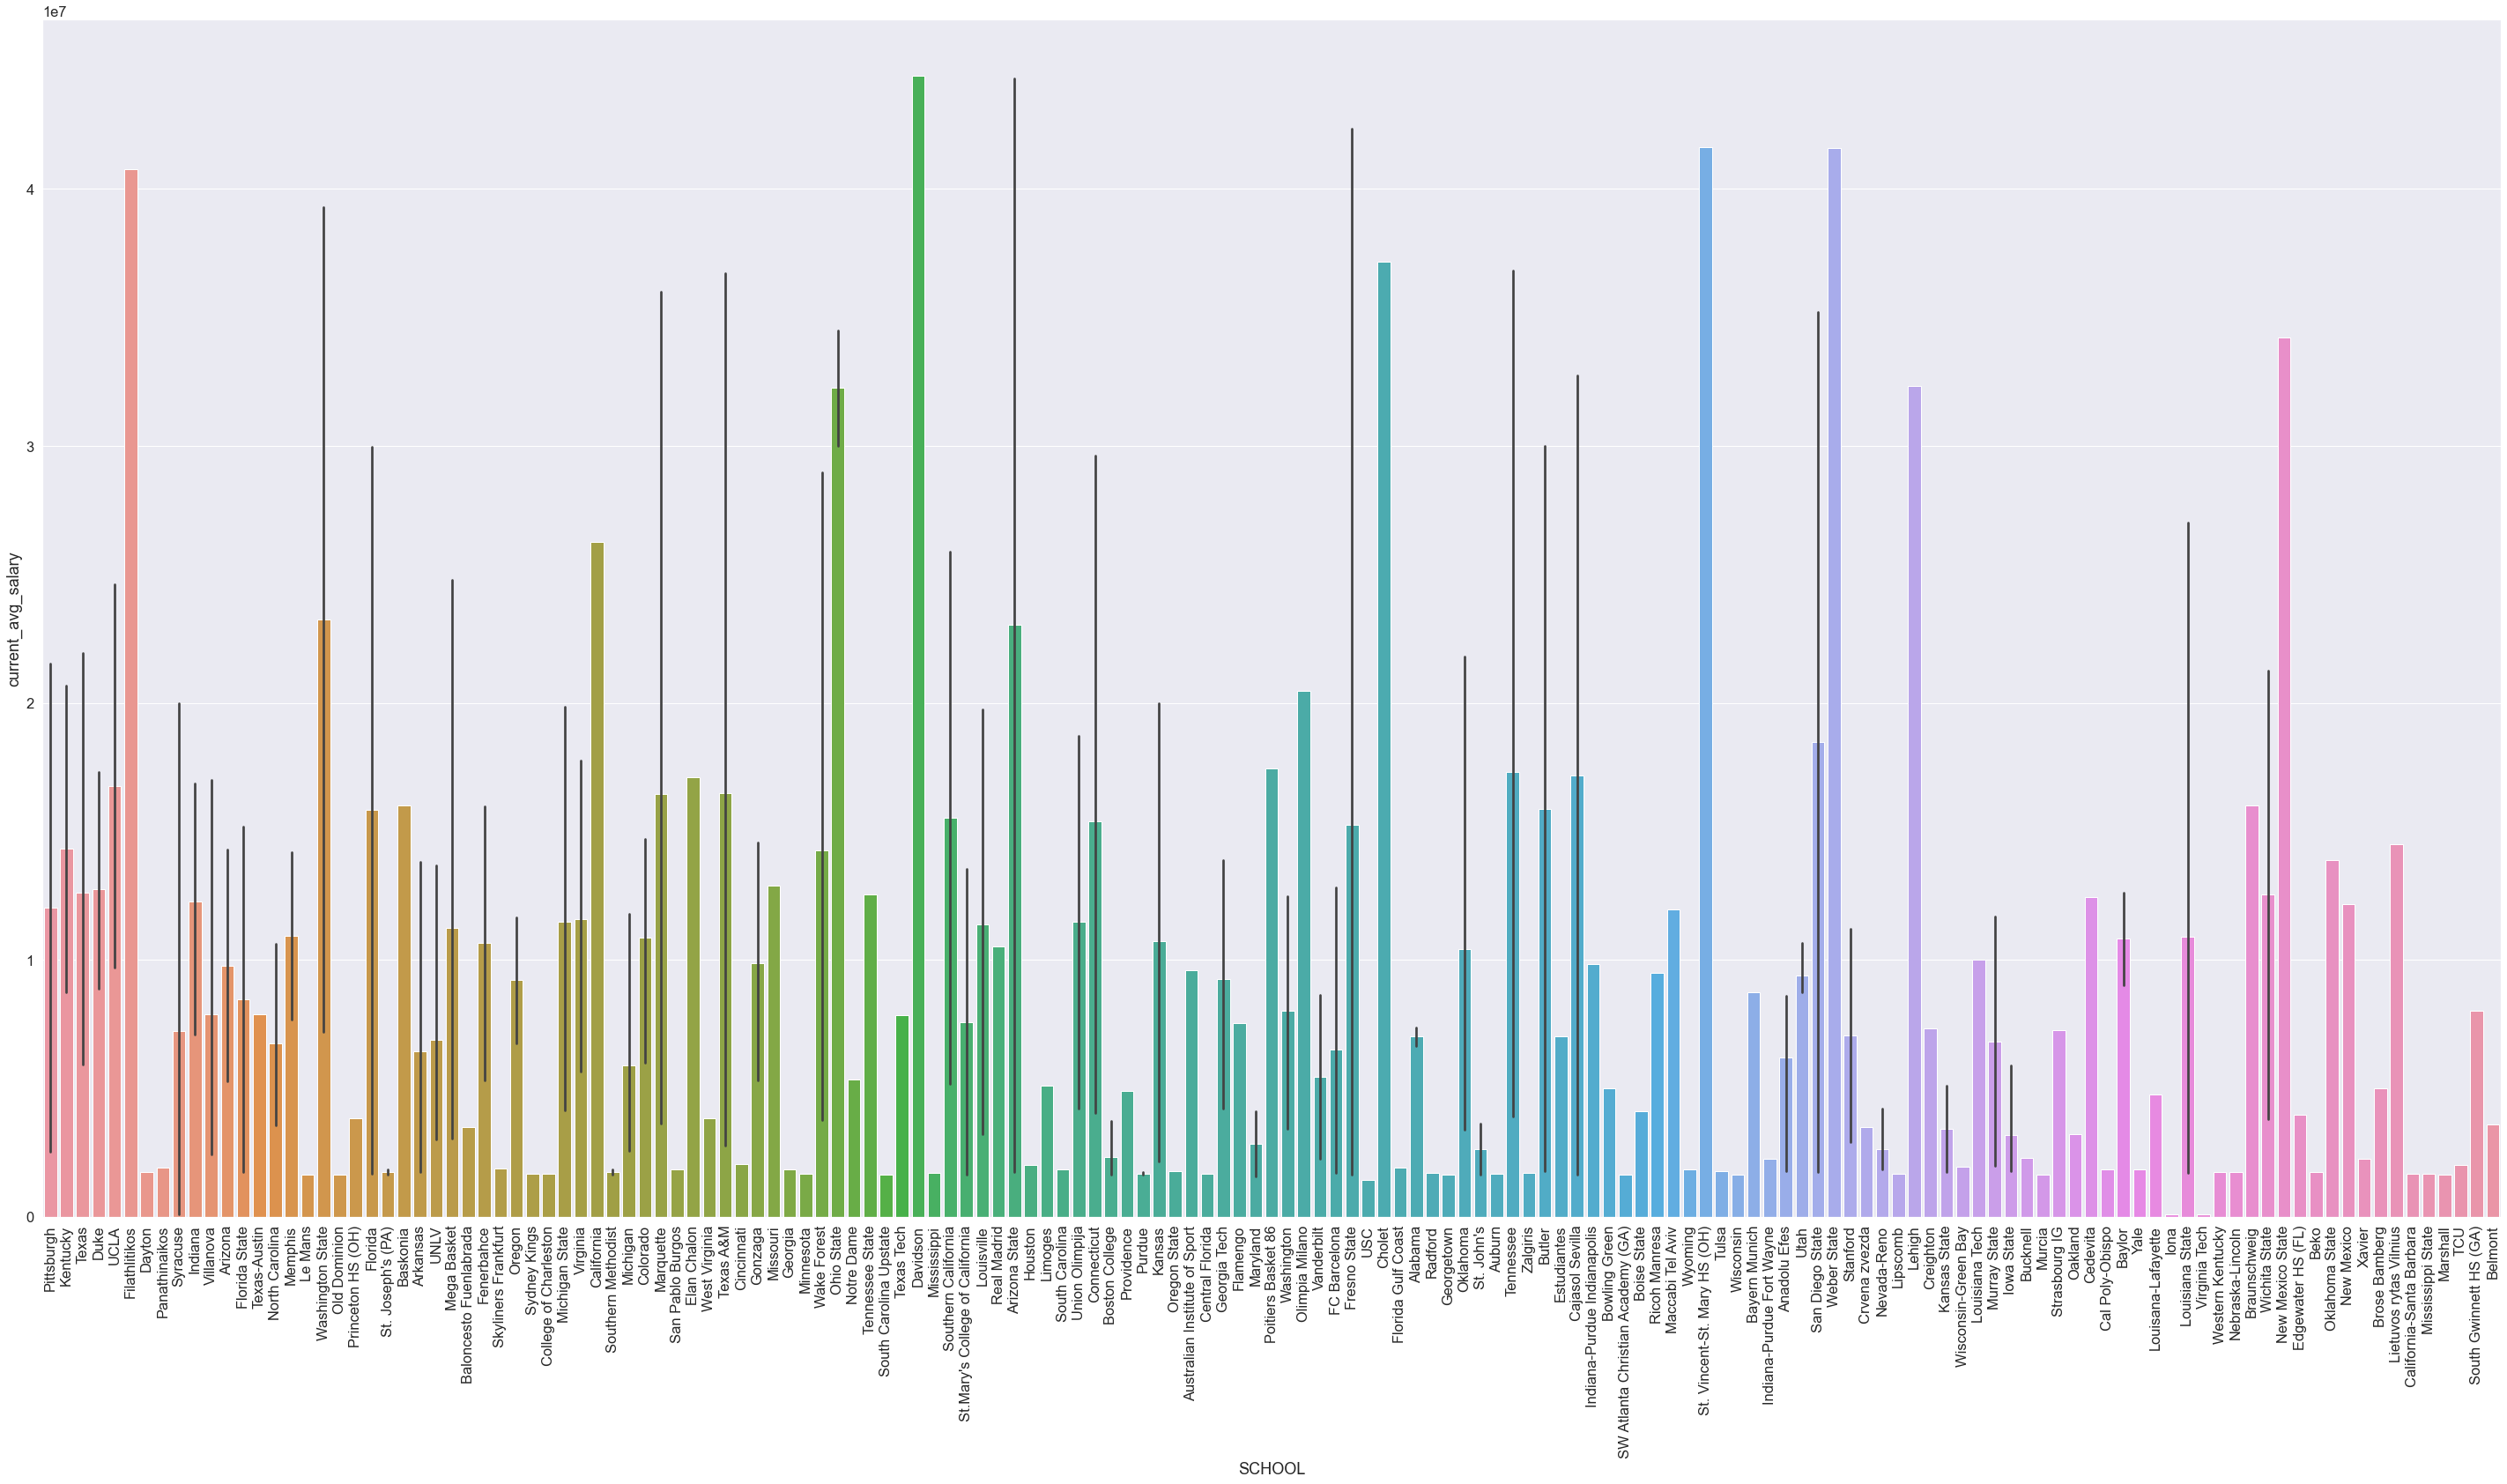

In [38]:
# plot school name against salary using median
sns.set(font_scale=1.5)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='SCHOOL', y='current_avg_salary', data=df)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152]),
 [Text(0, 0, 'Pittsburgh'),
  Text(1, 0, 'Kentucky'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Duke'),
  Text(4, 0, 'UCLA'),
  Text(5, 0, 'Fi

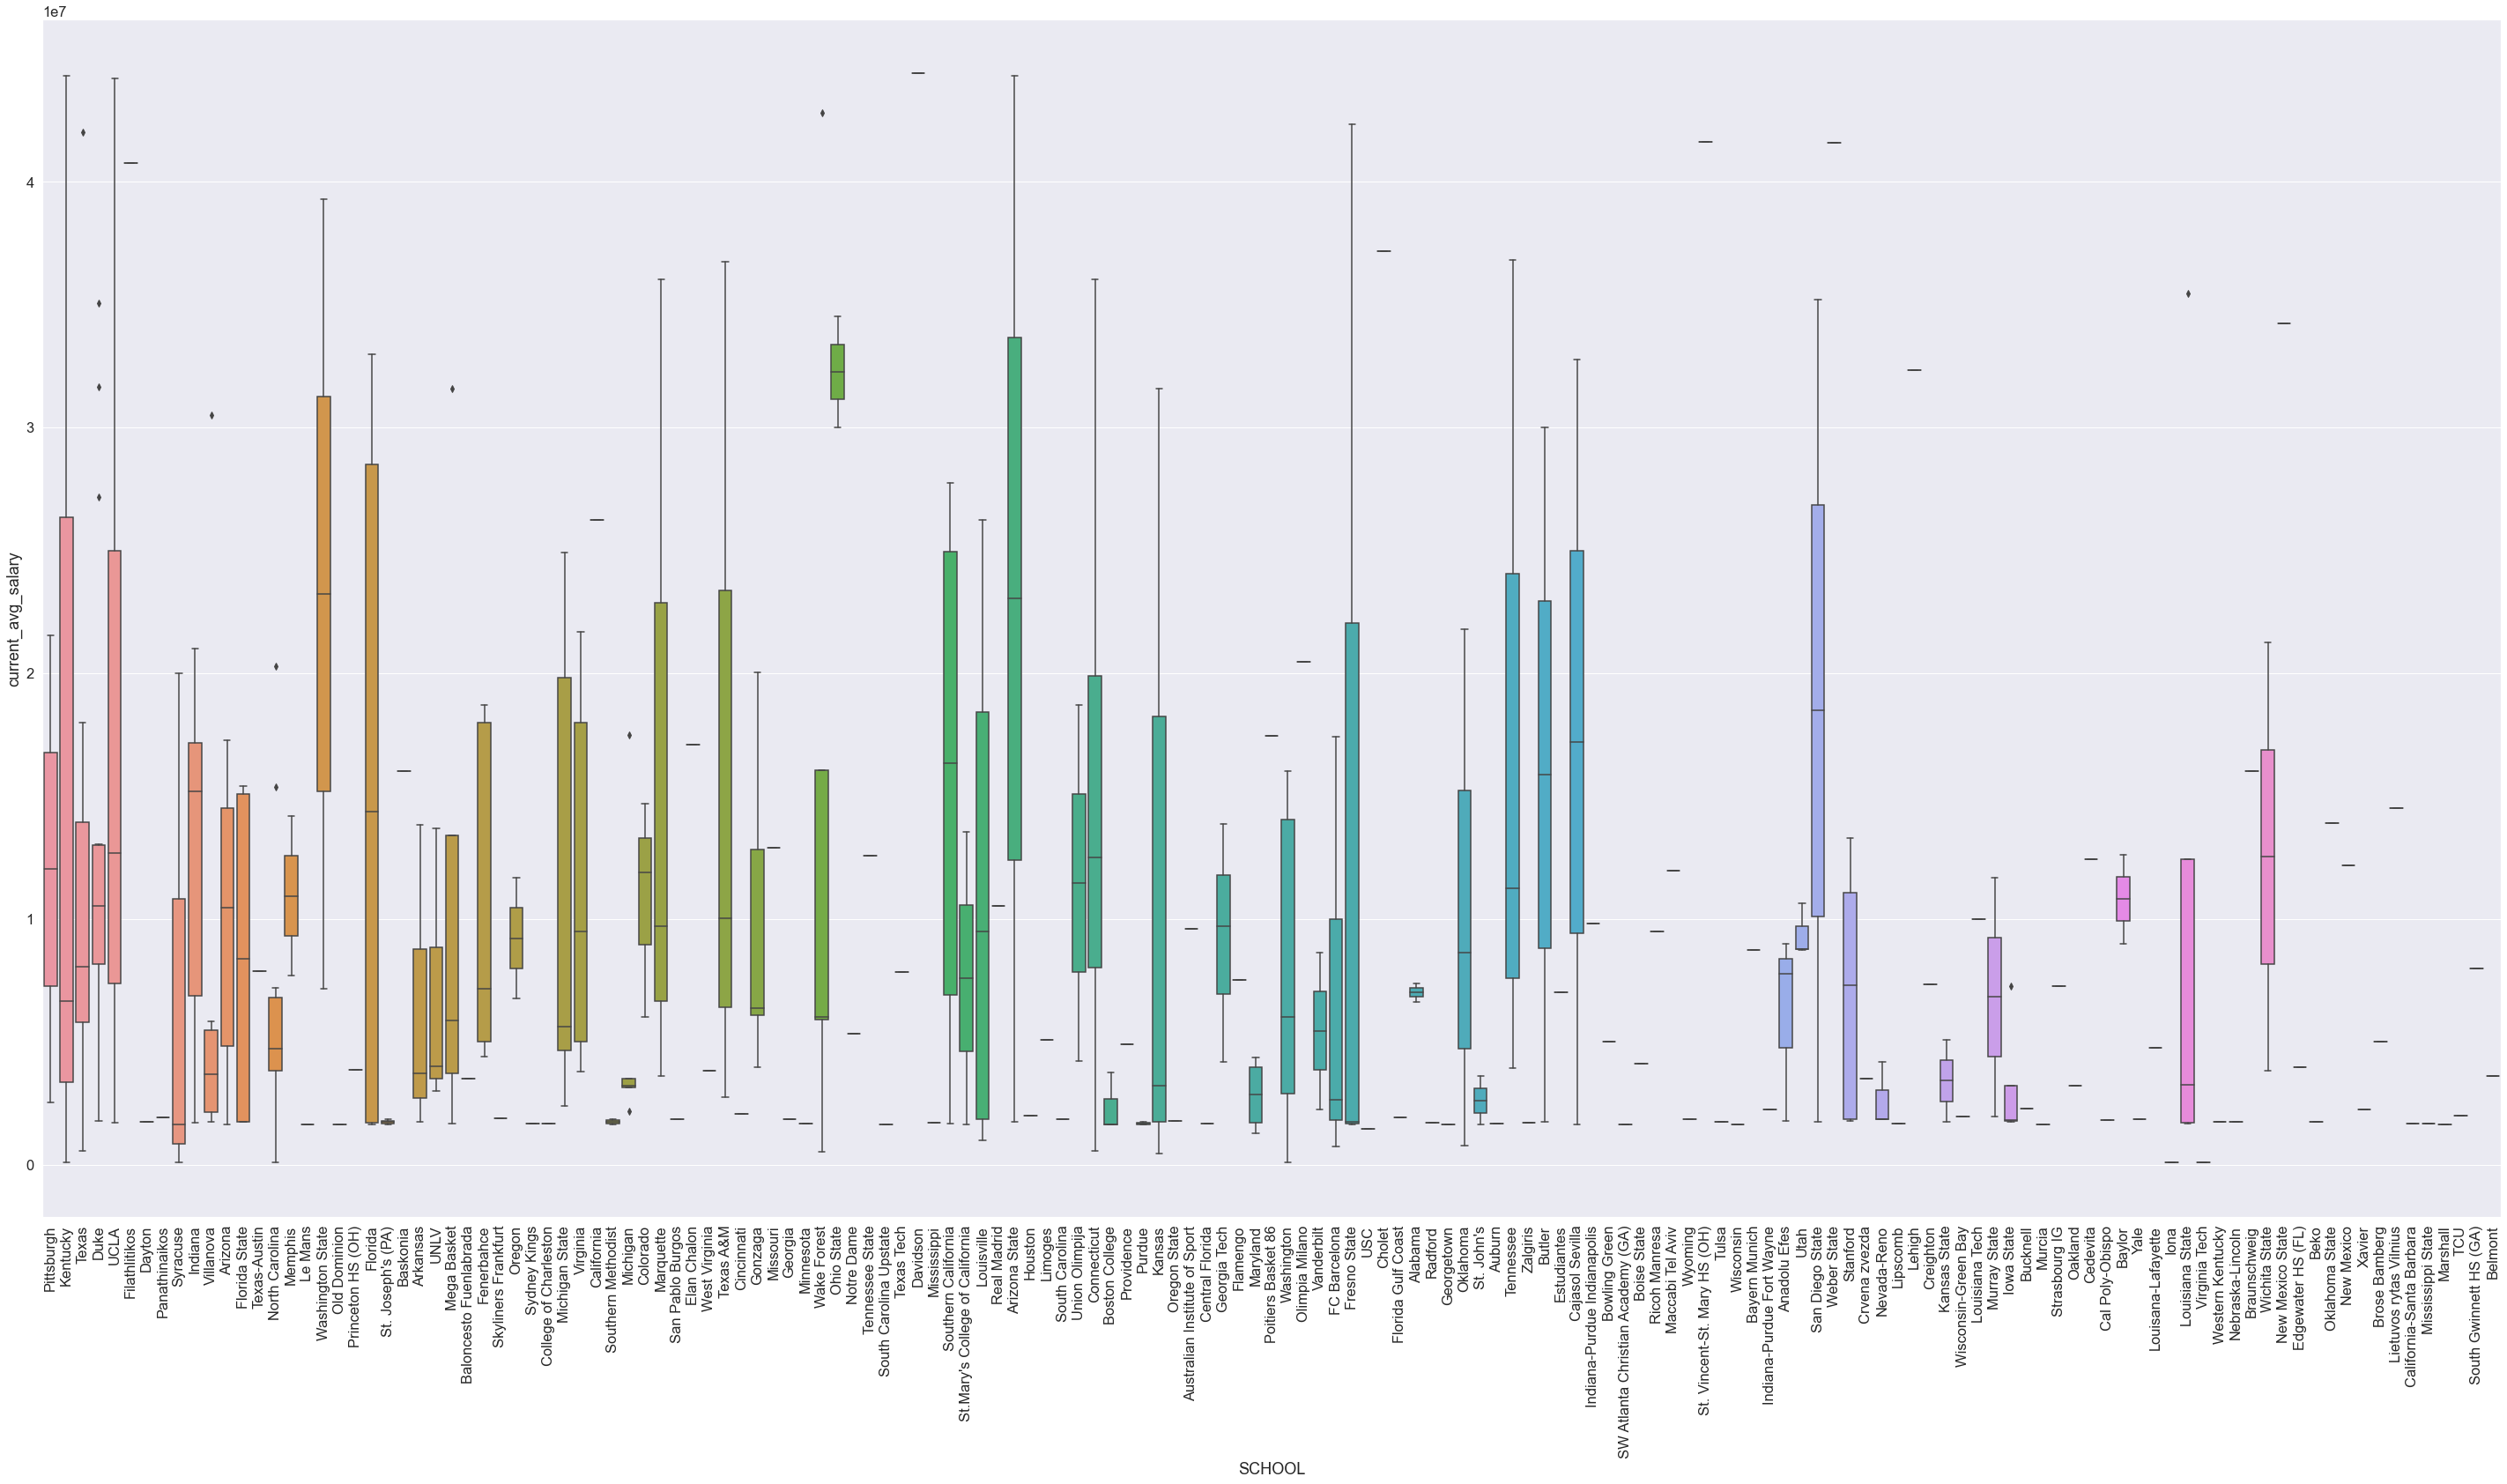

In [41]:
# make boxplot to see if there are outliners
sns.set(font_scale=1.5)
a4_dims = (50, 25)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='SCHOOL', y='current_avg_salary', data=df)
plt.xticks(rotation=90)